In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Map 1 library
import plotly.express as px

# Map 2 libraries
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')

Importar conjunts de dades

In [3]:
train_csv = pd.read_csv("./training_set.csv")
test_csv = pd.read_csv("./test_set.csv")
full_csv = pd.read_csv("./full_habla_updated_metadata.csv")
smile_csv = pd.read_csv("./smile_feature_selected.csv")


train_csv['Realornot'].value_counts()

Realornot
1    8939
0    8865
Name: count, dtype: int64

Anal·litzar la distribució de la variable objectiu, per a veure si està balancejada

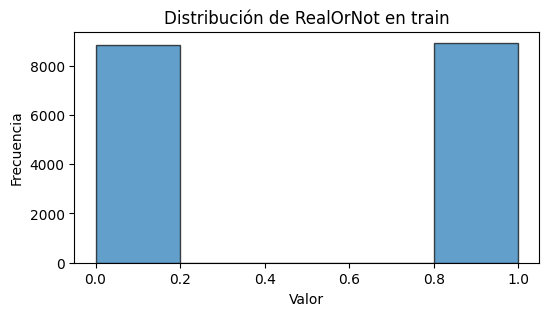

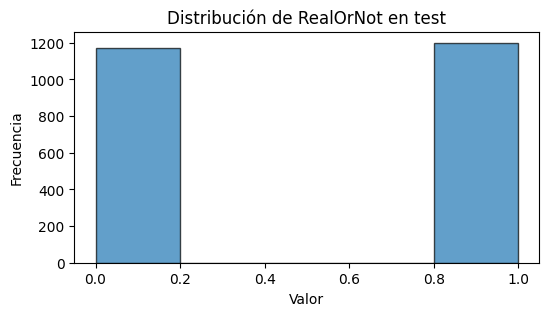

In [4]:
variable = train_csv['Realornot']
variable1 = test_csv['Realornot']
# Histograma
plt.figure(figsize=(6, 3))
plt.hist(variable, bins=5, edgecolor='k', alpha=0.7)
plt.title('Distribución de RealOrNot en train')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Histograma
plt.figure(figsize=(6, 3))
plt.hist(variable1, bins=5, edgecolor='k', alpha=0.7)
plt.title('Distribución de RealOrNot en test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [5]:
variable.value_counts()

Realornot
1    8939
0    8865
Name: count, dtype: int64

In [6]:
variable1.value_counts()

Realornot
1    1200
0    1172
Name: count, dtype: int64

<div class="alert alert-success">
La variable objectiu ja està balancejada, no cal aplicar mètodes de balanceig de dades
</div>


## SECCIÓ 1: CREACIÓ DEL DATAFRAME FINAL

In [7]:
smile_csv.describe()

,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,UniqueID
count,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000,80816.000000
mean,40407.500000,113.951954,43.353231,43.353231,47.828090,0.467605,1.446313,18.377609,0.905121,9.697731,4.774925,12.513296,1.519714,0.020971,0.021694,40408.500000
std,23329.714015,144.616993,114.393363,114.393363,133.652154,0.237702,0.355365,4.111353,0.287027,4.886923,790.898840,4.549507,74.041794,0.007419,0.006180,23329.714015
min,0.000000,0.000000,-2448.985600,-2448.985600,0.000000,0.041620,0.694461,-1.798633,-5.672723,-10.598875,-7098.178700,-9.022558,-5294.333500,0.006094,-0.001732,1.000000
25%,20203.750000,28.236189,17.524441,17.524441,8.628156,0.312310,1.185881,15.637055,0.740178,6.677935,0.821544,9.707822,0.807601,0.016006,0.017736,20204.750000
50%,40407.500000,86.174395,25.106316,25.106316,13.888202,0.420252,1.411638,18.347288,0.859837,10.086592,1.168653,12.790827,1.058141,0.019412,0.021502,40408.500000
75%,60611.250000,147.397380,37.825207,37.825207,28.633718,0.566612,1.659912,21.035505,1.016663,13.208384,1.845684,15.659869,1.468610,0.024068,0.024932,60612.250000
max,80815.000000,2087.097000,4659.957500,4659.957500,2294.165500,3.204929,4.222191,36.090004,38.977646,26.485899,219881.690000,28.030746,19617.963000,0.128665,0.062776,80816.000000


In [8]:
full_csv.describe()

,File_ID,File_Source_ID,File_Target_ID,Source_Utterance,Target_Utterance,Utterance,Variant,Times,UniqueID
count,22816.000000,53000.000000,58000.000000,5.300000e+04,5.300000e+04,2.281600e+04,2500.000000,80816.000000,80816.000000
mean,5318.306013,5627.025472,4978.257431,1.053960e+09,1.340034e+08,1.071037e+09,0.594800,135.546699,40408.500000
std,2931.884349,2992.791019,2809.097043,6.262829e+08,3.645009e+08,6.208544e+08,0.615438,194.773204,23329.714015
min,295.000000,295.000000,295.000000,6.927600e+04,0.000000e+00,6.927600e+04,0.000000,1.000000,1.000000
25%,2484.000000,3034.000000,2484.000000,5.018486e+08,1.630400e+04,5.353323e+08,0.000000,41.000000,20204.750000
50%,5223.000000,5223.000000,4310.000000,1.044592e+09,1.401600e+05,1.065023e+09,1.000000,51.000000,40408.500000
75%,8421.000000,8784.000000,7508.000000,1.584616e+09,9.944568e+07,1.611582e+09,1.000000,96.000000,60612.250000
max,9799.000000,9799.000000,9799.000000,2.147315e+09,2.147315e+09,2.147315e+09,2.000000,772.000000,80816.000000


In [9]:
train_csv.describe()

,UniqueID,Realornot
count,17804.000000,17804.000000
mean,48359.654741,0.502078
std,23540.862021,0.500010
min,4.000000,0.000000
25%,29993.250000,0.000000
50%,56484.500000,1.000000
75%,67218.500000,1.000000
max,80815.000000,1.000000


Unir tots els conjunts de dades

In [11]:
merged_df = pd.merge(train_csv, full_csv, on='UniqueID', how='inner')
merged_df = pd.merge(merged_df, smile_csv, on='UniqueID', how='inner')
merged_test = pd.merge(test_csv, smile_csv, on='UniqueID', how='inner')
merged_test = pd.merge(merged_test, full_csv, on='UniqueID', how='inner')
merged_df.head()



,F_path_x,Category,Source_ID_x,Target_ID_x,Source_Sex_x,Source_Country_x,Target_Sex_x,Target_Country_x,ID_x,Sex_x,...,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean
0,FinalDataset_16khz/Real/Argentina/arf_00295/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_00295,Female,...,0.300763,1.568339,17.253256,0.925168,17.812492,0.500698,14.972096,1.021553,0.022768,0.024434
1,FinalDataset_16khz/Real/Argentina/arf_00295/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_00295,Female,...,0.312016,1.864721,12.843270,0.998090,18.405964,0.540551,18.569187,0.752821,0.024398,0.025589
2,FinalDataset_16khz/Real/Argentina/arf_00295/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_00295,Female,...,0.354954,1.580724,15.459043,0.978528,16.688513,0.688499,19.077845,0.595128,0.019707,0.026735
3,FinalDataset_16khz/Real/Argentina/arf_00295/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_00295,Female,...,0.372097,1.337209,20.966034,0.712422,14.891723,0.889105,16.558605,0.840130,0.018888,0.021093
4,FinalDataset_16khz/Real/Argentina/arf_00295/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_00295,Female,...,0.468941,1.398896,21.116756,0.774850,13.436496,1.110517,12.953899,1.262700,0.015973,0.021942


In [12]:
merged_test.head()

,F_path_x,Category,Source_ID_x,Target_ID_x,Source_Sex_x,Source_Country_x,Target_Sex_x,Target_Country_x,ID_x,Sex_x,...,Target_Sex_y,Target_Country_y,Sex_y,Country_y,Source_Utterance,Target_Utterance,Utterance,Variant,Transcription,Times
0,FinalDataset_16khz/Real/Argentina/arf_07060/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_07060,Female,...,NaN,NaN,Female,Argentina,NaN,NaN,1.060809e+09,NaN,øQuiere que le proporcione la direcciÛn electr...,18
1,FinalDataset_16khz/Real/Argentina/arf_07060/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_07060,Female,...,NaN,NaN,Female,Argentina,NaN,NaN,2.139970e+09,NaN,"En el estadio, va a hacer mucho fr√≠",7
2,FinalDataset_16khz/Real/Argentina/arf_07060/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_07060,Female,...,NaN,NaN,Female,Argentina,NaN,NaN,1.293921e+09,NaN,Esa palabra viene del griego cl√°sic,100
3,FinalDataset_16khz/Real/Argentina/arf_07060/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_07060,Female,...,NaN,NaN,Female,Argentina,NaN,NaN,1.141051e+09,NaN,øLas ruedas van en la parte de atr·s o en la p...,53
4,FinalDataset_16khz/Real/Argentina/arf_07060/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_07060,Female,...,NaN,NaN,Female,Argentina,NaN,NaN,1.742611e+09,NaN,Lo pod√©s pagar con la tarjeta oro de Mastercar,10


### 1.1 DISTRIBUCIONS VARIABLES NUMÈRIQUES

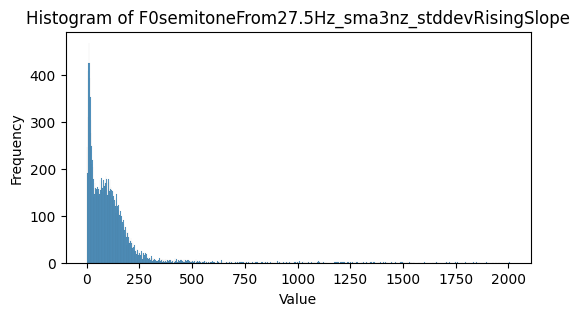

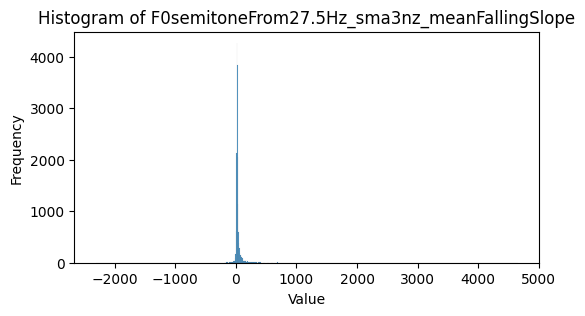

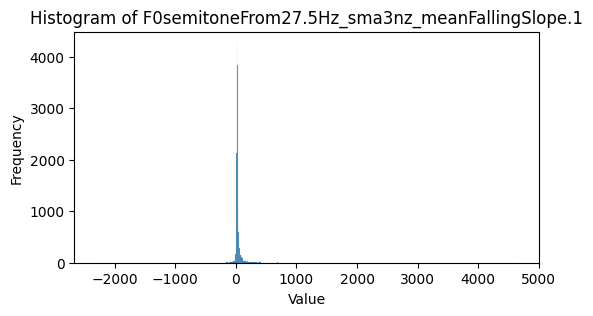

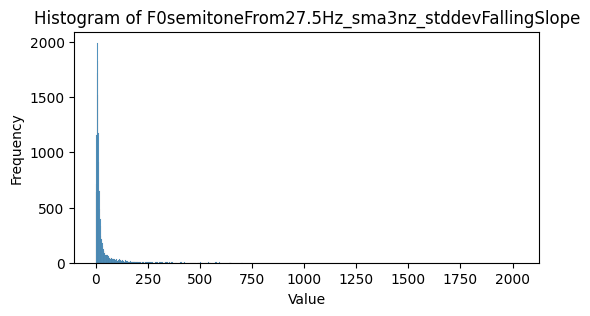

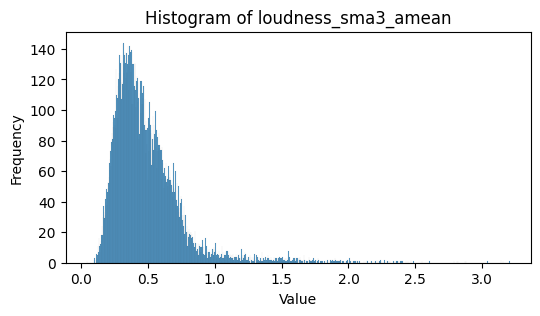

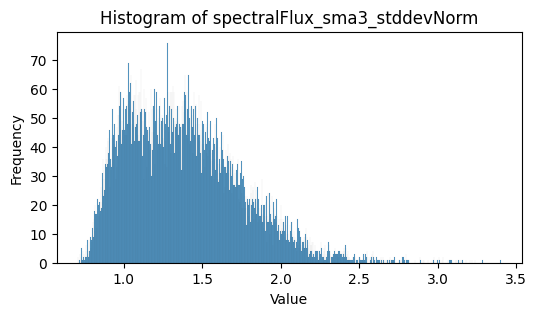

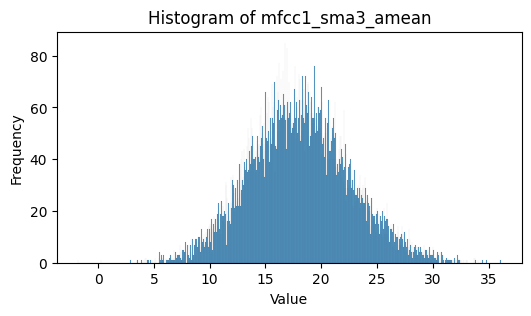

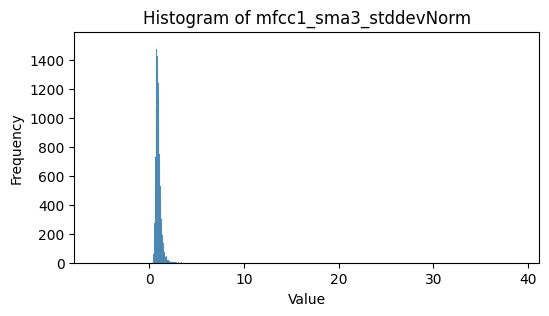

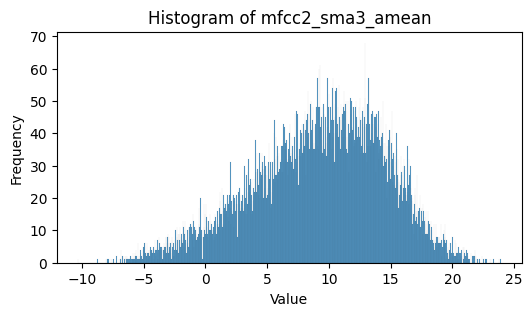

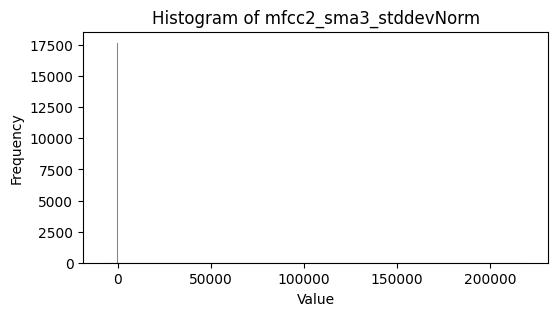

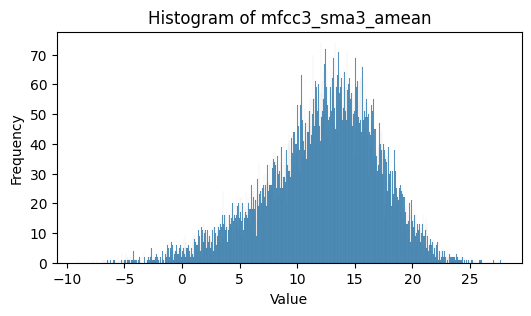

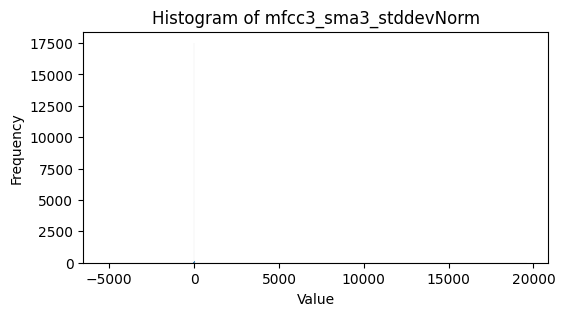

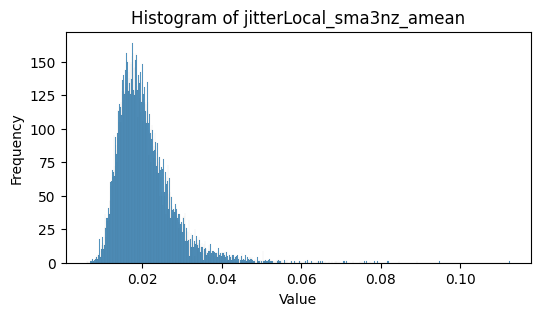

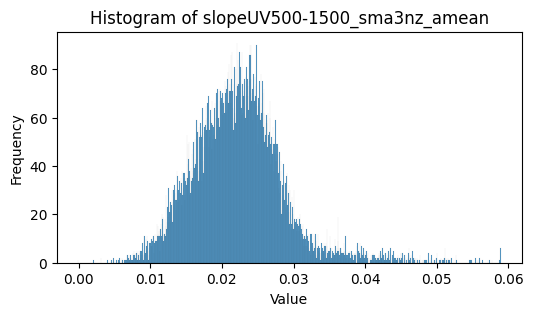

In [13]:

## ELIMINAR VARIABLES QUE NO S'UTILITZARAN PER AL PROJECTE
columns_to_drop = [
    'File_ID', 
    'File_Source_ID', 
    'File_Target_ID', 
    'Source_Utterance', 
    'Target_Utterance', 
    'Utterance', 
    'Variant',
    'Category'
]

merged_df = merged_df.drop(columns=columns_to_drop)

numeric_columns = merged_df.select_dtypes(include='float64').columns

for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    
    sns.histplot(merged_df[col], bins=1000, edgecolor='black', binrange=(merged_df[col].min(), merged_df[col].max()))
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    plt.show()

Eliminar les columnes que s'han duplicat a l'unir els diferents conjunts

In [14]:
duplicated_columns = merged_df.T.duplicated()

duplicated_column_names = merged_df.columns[duplicated_columns].tolist()

duplicated_column_names

['F_path_y',
 'ID_y',
 'Source_ID_y',
 'Target_ID_y',
 'Source_Sex_y',
 'Source_Country_y',
 'Target_Sex_y',
 'Target_Country_y',
 'Sex_y',
 'Country_y',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1']

In [15]:
# ELIMINAR LES COLUMNES DUPLICADES
merged_df = merged_df.loc[:, ~merged_df.T.duplicated()]

# Verificar
merged_df.columns

Index(['F_path_x', 'Source_ID_x', 'Target_ID_x', 'Source_Sex_x',
       'Source_Country_x', 'Target_Sex_x', 'Target_Country_x', 'ID_x', 'Sex_x',
       'Country_x', 'UniqueID', 'Realornot', 'Filename', 'F1', 'F2', 'F3',
       'F4', 'Transcription', 'Times', 'Unnamed: 0',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean'],
      dtype='object')

In [16]:
# ELIMINAR VARIABLES QUE NO S'UTILITZARAN PER AL PROJECTE
columns_to_drop = [
    'Filename', 'F1', 'F2', 'F3', 'F4',
    'F_path_x', 'Source_ID_x', 'Target_ID_x',
    'Transcription', 'Times','Unnamed: 0','Source_Sex_x',
    'Source_Country_x','ID_x','UniqueID'
]

merged_df = merged_df.drop(columns=columns_to_drop, errors='ignore')



In [17]:
##MISSINGS
missings = merged_df.isnull().sum()
missings = missings[missings > 0]
missings

Target_Sex_x        8939
Target_Country_x    8939
Sex_x               8865
Country_x           8865
dtype: int64

<div class="alert alert-success">
Al veure els missings d'aquestes variables, es decideix unir-les en una única variable per a Sex i Country
</div>


In [18]:

# Combinar columnes per crear 'Final_sex' i 'Final_country'
merged_df['Final_sex'] = merged_df['Sex_x'].combine_first(merged_df['Target_Sex_x'])
merged_df['Final_country'] = merged_df['Country_x'].combine_first(merged_df['Target_Country_x'])

# Eliminar les columnes originals
merged_df.drop(['Target_Sex_x', 'Target_Country_x', 'Sex_x', 'Country_x'], axis=1, inplace=True)



In [19]:
merged_df.to_csv('./merged_dataset.csv', index=False)
merged_df.head()
##COMPROVAR QUE S'HAN ELIMINAT CORRECTAMENT

,Realornot,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,Final_sex,Final_country
0,1,59.642597,80.991450,95.311790,0.300763,1.568339,17.253256,0.925168,17.812492,0.500698,14.972096,1.021553,0.022768,0.024434,Female,Argentina
1,1,7.781728,32.577520,0.069057,0.312016,1.864721,12.843270,0.998090,18.405964,0.540551,18.569187,0.752821,0.024398,0.025589,Female,Argentina
2,1,14.860586,18.454376,4.102248,0.354954,1.580724,15.459043,0.978528,16.688513,0.688499,19.077845,0.595128,0.019707,0.026735,Female,Argentina
3,1,13.270463,85.602270,146.907210,0.372097,1.337209,20.966034,0.712422,14.891723,0.889105,16.558605,0.840130,0.018888,0.021093,Female,Argentina
4,1,43.167866,22.110174,9.190903,0.468941,1.398896,21.116756,0.774850,13.436496,1.110517,12.953899,1.262700,0.015973,0.021942,Female,Argentina


<div class="alert alert-success">
FER PARTICIÓ TRAIN I VAL
</div>


In [20]:
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns=['Realornot'])  
y = merged_df['Realornot']  

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_split = X_train.copy()
train_split['Realornot'] = y_train

val_split = X_val.copy()
val_split['Realornot'] = y_val

partition_summary = {
    "Partition": ["Train", "Validation"],
    "Size": [len(train_split), len(val_split)],
    "Real Samples (%)": [
        y_train.value_counts(normalize=True)[1] * 100,
        y_val.value_counts(normalize=True)[1] * 100,
    ],
    "Synthetic Samples (%)": [
        y_train.value_counts(normalize=True)[0] * 100,
        y_val.value_counts(normalize=True)[0] * 100,
    ],
}

summary_df = pd.DataFrame(partition_summary)
summary_df


,Partition,Size,Real Samples (%),Synthetic Samples (%)
0,Train,14243,50.207119,49.792881
1,Validation,3561,50.210615,49.789385


### 1.2 TRACTAMENT DE MISSINGS

In [21]:
train_split.to_csv('./train_df.csv', index=False)
val_split.to_csv('./val_df.csv', index=False)
## GUARDAR LES PARTICIONS FETES

In [22]:
## COMPTAR VALORS NULS
train_csv = pd.read_csv("./train_df.csv")
val_csv = pd.read_csv("./val_df.csv")
missings = train_csv.isnull().sum()
missings1 = val_csv.isnull().sum()

missings
missings1


F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope     0
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope      0
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope    0
loudness_sma3_amean                               0
spectralFlux_sma3_stddevNorm                      0
mfcc1_sma3_amean                                  0
mfcc1_sma3_stddevNorm                             0
mfcc2_sma3_amean                                  0
mfcc2_sma3_stddevNorm                             0
mfcc3_sma3_amean                                  0
mfcc3_sma3_stddevNorm                             0
jitterLocal_sma3nz_amean                          0
slopeUV500-1500_sma3nz_amean                      0
Final_sex                                         0
Final_country                                     0
Realornot                                         0
dtype: int64

<div class="alert alert-success">
A priori no hi ha missings, però, es comptarà a continuació la quantitat total de zeros en les variables numèriques, ja que són missings.
</div>

In [23]:
def count_zeros(dataset):
    zero_counts = {}  # Diccionari per emmagatzemar el comptatge de zeros
    
    for column in dataset.columns:
        zero_count = (dataset[column] == 0.00).sum()
        zero_counts[column] = zero_count
    
    zero_counts_df = pd.DataFrame(list(zero_counts.items()), columns=['Column', 'Zero_Count'])
    
    return zero_counts_df

# Seleccionar només les columnes numèriques excloent 'Realornot'
numeric_columns_without_realornot_train = train_csv.select_dtypes(include=['number']).columns.difference(['Realornot'])

zero_counts_train = count_zeros(train_csv[numeric_columns_without_realornot_train])

zero_counts_train


,Column,Zero_Count
0,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,1
1,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,370
2,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,119
3,jitterLocal_sma3nz_amean,0
4,loudness_sma3_amean,0
5,mfcc1_sma3_amean,0
6,mfcc1_sma3_stddevNorm,0
7,mfcc2_sma3_amean,0
8,mfcc2_sma3_stddevNorm,0
9,mfcc3_sma3_amean,0


In [24]:
##FER EL MATEIX PER AL CONJUNT DE VALIDACIÓ
numeric_columns_without_realornot_val = val_csv.select_dtypes(include=['number']).columns.difference(['Realornot'])

zero_counts_val = count_zeros(val_csv[numeric_columns_without_realornot_val])


zero_counts_val

,Column,Zero_Count
0,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,0
1,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,85
2,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,29
3,jitterLocal_sma3nz_amean,0
4,loudness_sma3_amean,0
5,mfcc1_sma3_amean,0
6,mfcc1_sma3_stddevNorm,0
7,mfcc2_sma3_amean,0
8,mfcc2_sma3_stddevNorm,0
9,mfcc3_sma3_amean,0


<div class="alert alert-success">
IMPUTAR MISSINGS AMB LA MEDIANA
</div>

In [26]:

# Funció per comptar valors 0.000 i imputar missings
def count_zeros_and_impute(dataset):
    zero_counts = {}  
    numeric_columns_without_realornot = dataset.select_dtypes(include=['number']).columns.difference(['Realornot'])
    for column in numeric_columns_without_realornot:
        zero_count = (dataset[column] == 0.00).sum()
        zero_counts[column] = zero_count

        # Reemplaçar 0.000 per NaN
        dataset[column] = dataset[column].replace(0.000, pd.NA)

        # Imputar missings (NaN) amb la mediana
        median_value = dataset[column].median()  # Calcular la mediana
        dataset[column] = dataset[column].fillna(median_value)  # Reemplaçar NaN amb la mediana

    zero_counts_df = pd.DataFrame(list(zero_counts.items()), columns=['Column', 'Zero_Count'])

    return zero_counts_df, dataset

# Aplicar la funció als datasets train_csv i val_csv
zero_counts_train, train_csv_imputed = count_zeros_and_impute(train_csv)
zero_counts_val, val_csv_imputed = count_zeros_and_impute(val_csv)

zero_counts_train


,Column,Zero_Count
0,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,0
1,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,0
2,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,0
3,jitterLocal_sma3nz_amean,0
4,loudness_sma3_amean,0
5,mfcc1_sma3_amean,0
6,mfcc1_sma3_stddevNorm,0
7,mfcc2_sma3_amean,0
8,mfcc2_sma3_stddevNorm,0
9,mfcc3_sma3_amean,0


In [27]:
zero_counts_val

,Column,Zero_Count
0,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,0
1,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,0
2,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,0
3,jitterLocal_sma3nz_amean,0
4,loudness_sma3_amean,0
5,mfcc1_sma3_amean,0
6,mfcc1_sma3_stddevNorm,0
7,mfcc2_sma3_amean,0
8,mfcc2_sma3_stddevNorm,0
9,mfcc3_sma3_amean,0


<div class="alert alert-success">
Missings imputats correctament
</div>

In [28]:
##ACTUALITZAR EL CONJUNT DE DADES IMPUTAT
train_csv.to_csv('./train_df.csv', index=False)
val_csv.to_csv('./val_df.csv', index=False)

### 1.3 DISTRIBUCIONS VARIABLES CATEGÒRIQUES

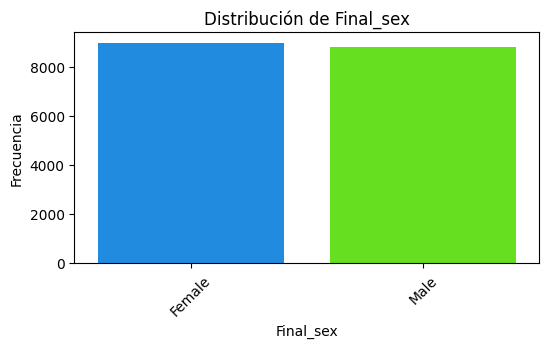

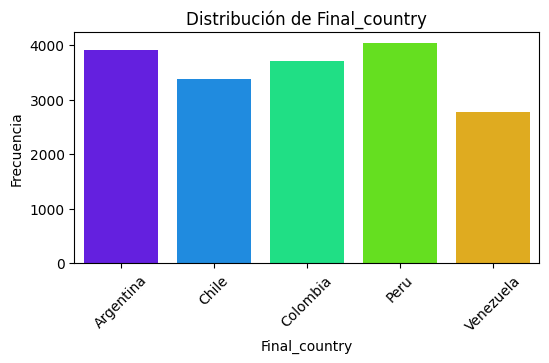

In [29]:
cat_features = ['Final_sex', 'Final_country']

for col in cat_features:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=merged_df, x=col, palette='gist_rainbow_r')  # Asegúrate de usar merged_df
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()


### 1.4 TRACTAMENT D'OUTLIERS

In [30]:
train_csv_1 = pd.read_csv("./train_df.csv")
# Seleccionar columnas numéricas
numeric_columns = train_csv_1.select_dtypes(include=['number']).columns

for column in numeric_columns:
    print(f"\nProcesando columna: {column}")
    
    # Calcular Q1, Q3 e IQR
    Q1 = train_csv_1[column].quantile(0.25)
    Q3 = train_csv_1[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular valors de tall per a detectar outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    print(f"  - Q1 (25%): {Q1}")
    print(f"  - Q3 (75%): {Q3}")
    print(f"  - IQR: {IQR}")
    print(f"  - Valores fuera de rango: < {lower_bound} o > {upper_bound}")
    
    # Identificar outliers per sota i per sobre dels límits
    small_outliers = (train_csv_1[column] < lower_bound).sum()
    big_outliers = (train_csv_1[column] > upper_bound).sum()
    
    print(f"  - Outliers por debajo: {small_outliers}")
    print(f"  - Outliers por encima: {big_outliers}")





Procesando columna: F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope
  - Q1 (25%): 29.0911435
  - Q3 (75%): 141.58102
  - IQR: 112.4898765
  - Valores fuera de rango: < -139.64367125 o > 310.31583475
  - Outliers por debajo: 0
  - Outliers por encima: 597

Procesando columna: F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope
  - Q1 (25%): 17.243138000000002
  - Q3 (75%): 35.278014999999996
  - IQR: 18.034876999999994
  - Valores fuera de rango: < -9.80917749999999 o > 62.33033049999999
  - Outliers por debajo: 316
  - Outliers por encima: 1551

Procesando columna: F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope
  - Q1 (25%): 8.808557
  - Q3 (75%): 25.336498499999998
  - IQR: 16.527941499999997
  - Valores fuera de rango: < -15.983355249999995 o > 50.12841074999999
  - Outliers por debajo: 0
  - Outliers por encima: 2095

Procesando columna: loudness_sma3_amean
  - Q1 (25%): 0.321116865
  - Q3 (75%): 0.5933426500000001
  - IQR: 0.2722257850000001
  - Valores fuera de rango: < -0.087221812500000

Imputar els outliers amb la mediana, s'aplica transformació logarítmica a les variables que no són gaussianes


Processant columna: F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope
  - Outliers substituïts per la mediana: 4.438504198732655


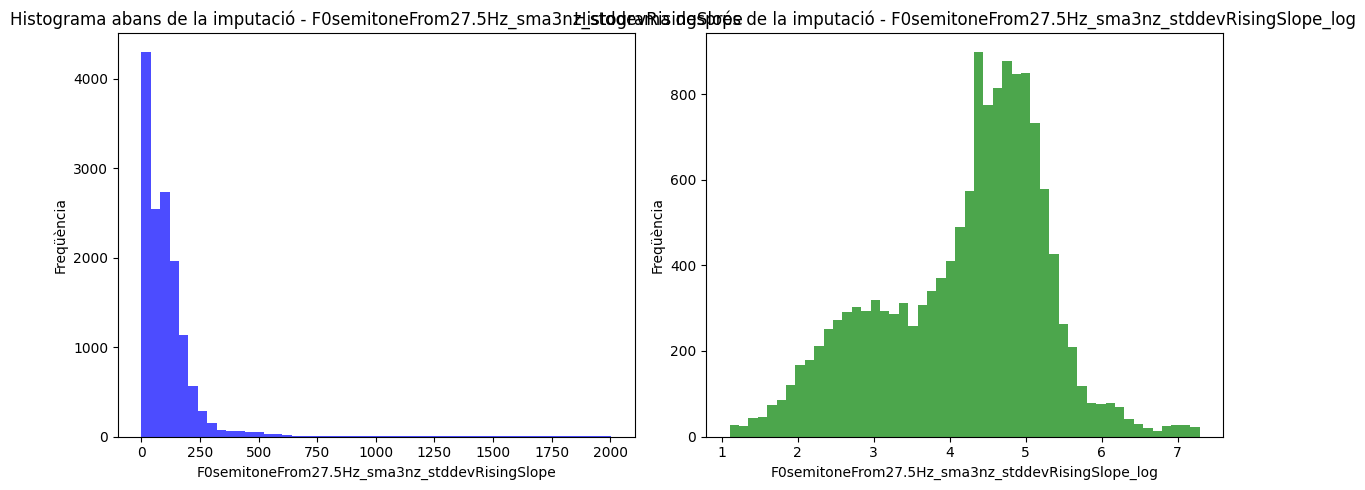


Processant columna: F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope
  - Outliers substituïts per la mediana: 24.284646


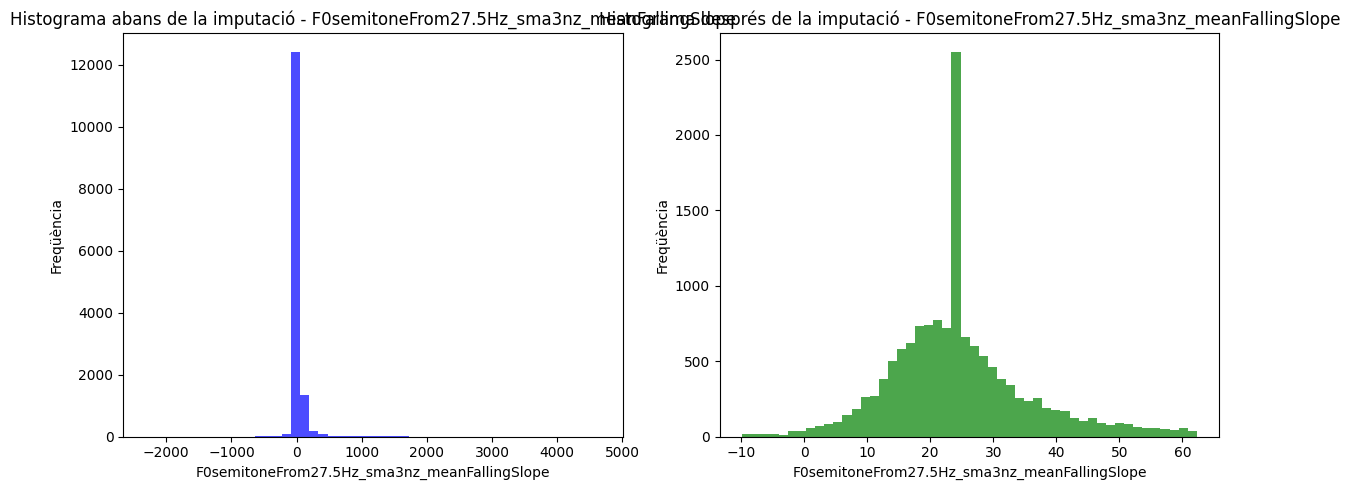


Processant columna: F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope
  - Outliers substituïts per la mediana: 2.683124316305993


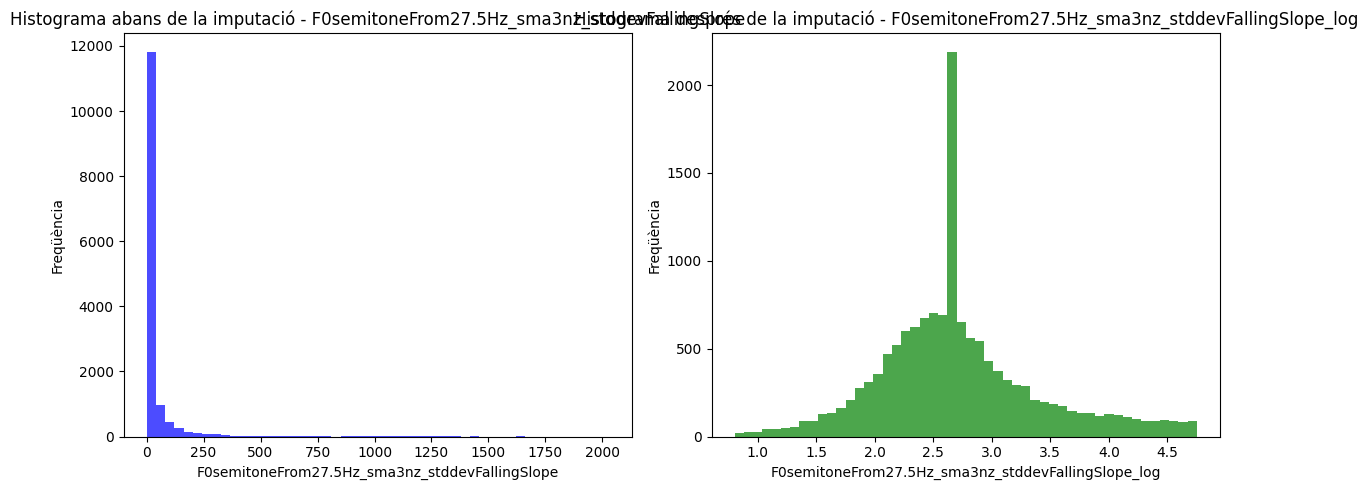


Processant columna: loudness_sma3_amean
  - Outliers substituïts per la mediana: 0.4351818


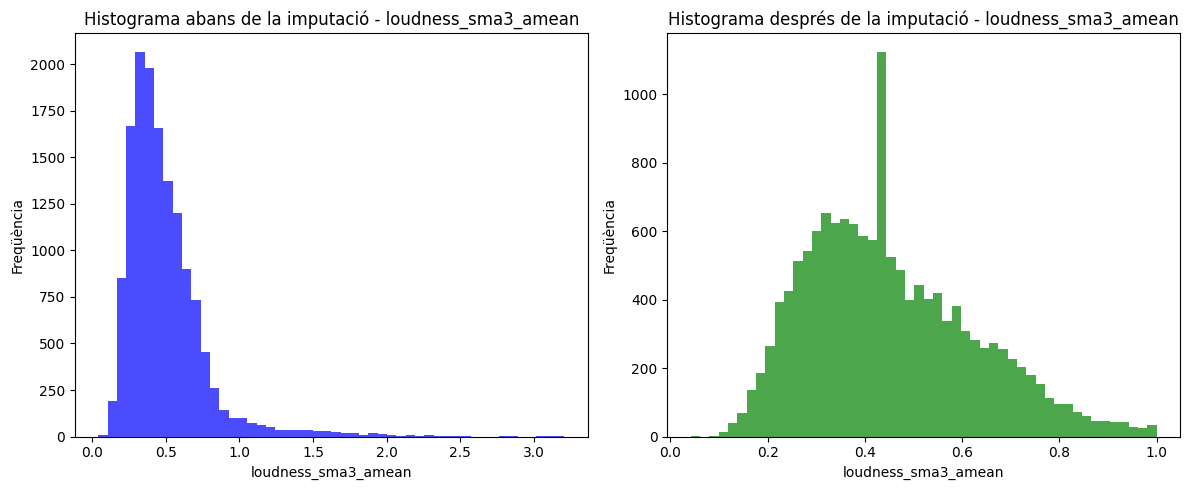


Processant columna: spectralFlux_sma3_stddevNorm
  - Outliers substituïts per la mediana: 1.3421596


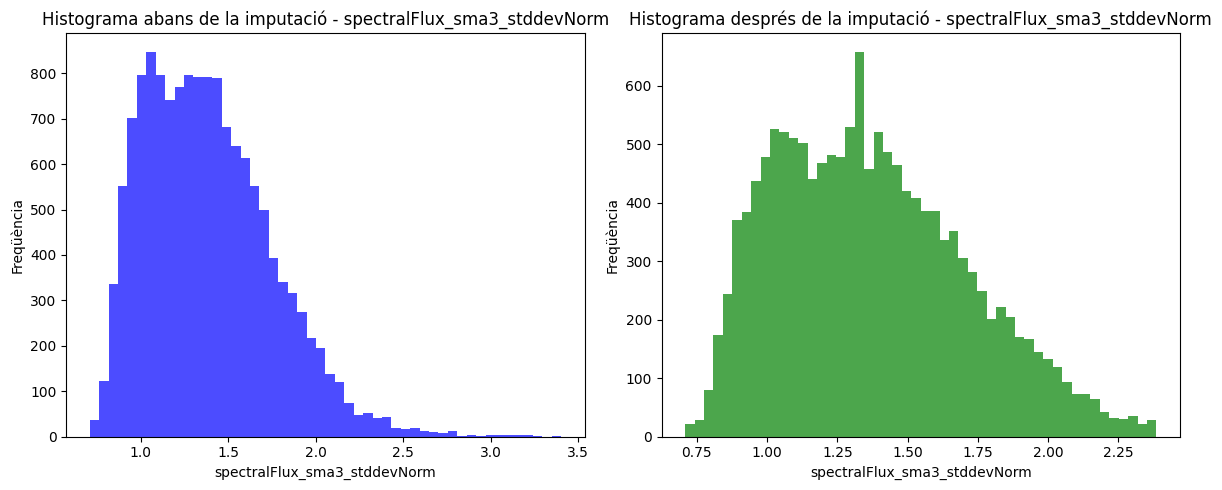


Processant columna: mfcc1_sma3_amean
  - Outliers substituïts per la mediana: 17.902372


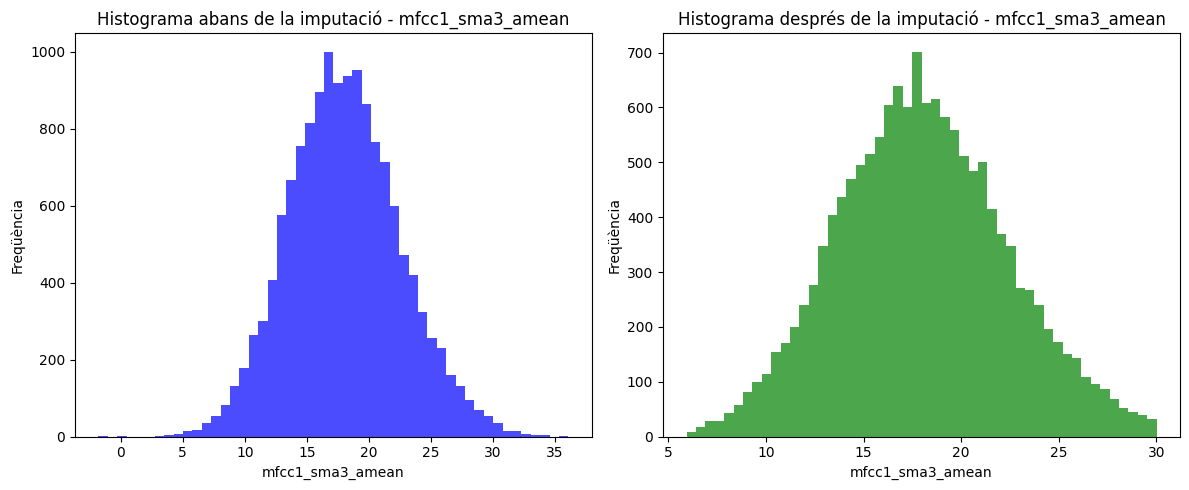


Processant columna: mfcc1_sma3_stddevNorm
  - Outliers substituïts per la mediana: 0.8996587


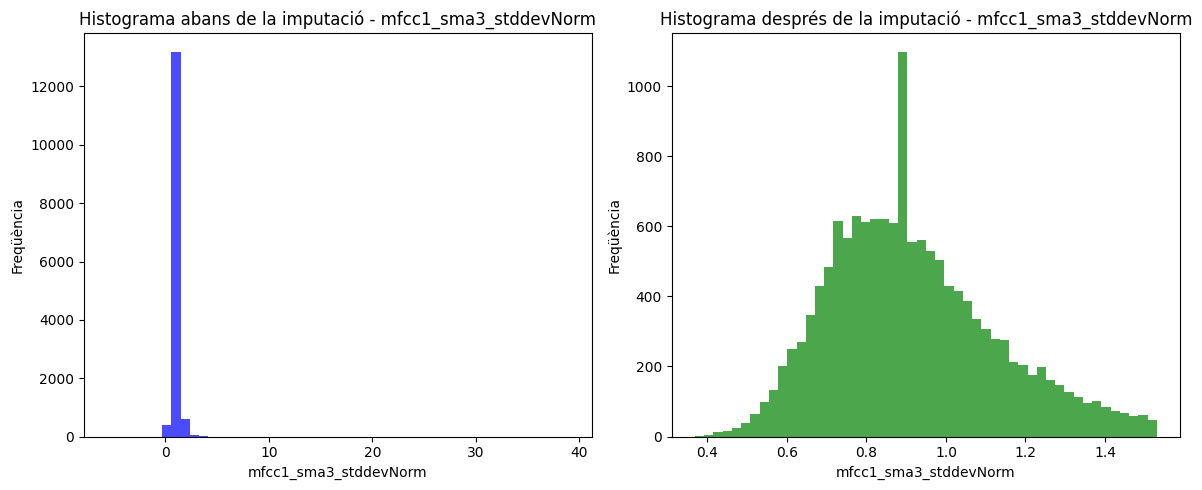


Processant columna: mfcc2_sma3_amean
  - Outliers substituïts per la mediana: 9.726804


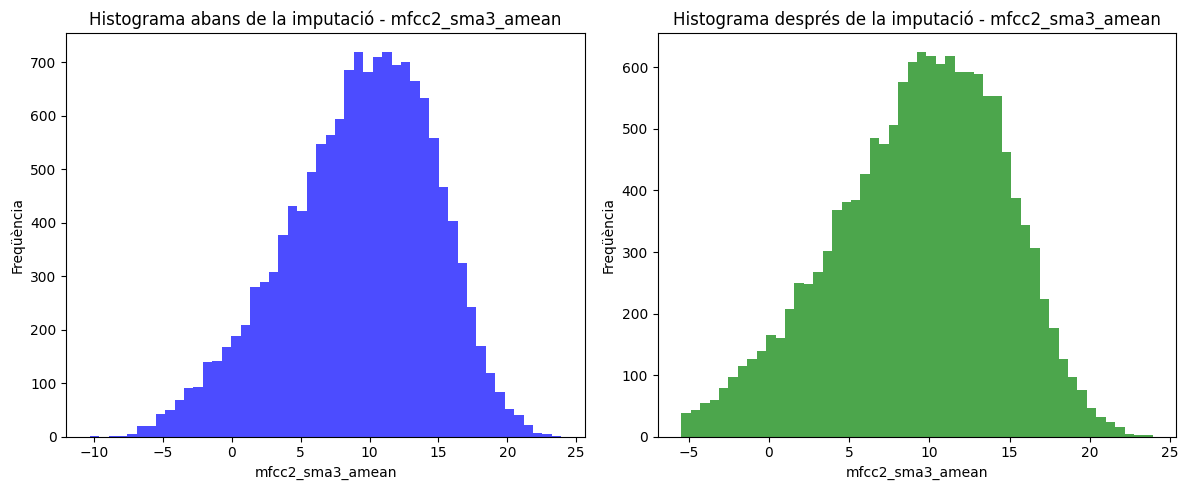


Processant columna: mfcc2_sma3_stddevNorm
  - Outliers substituïts per la mediana: 1.1878935


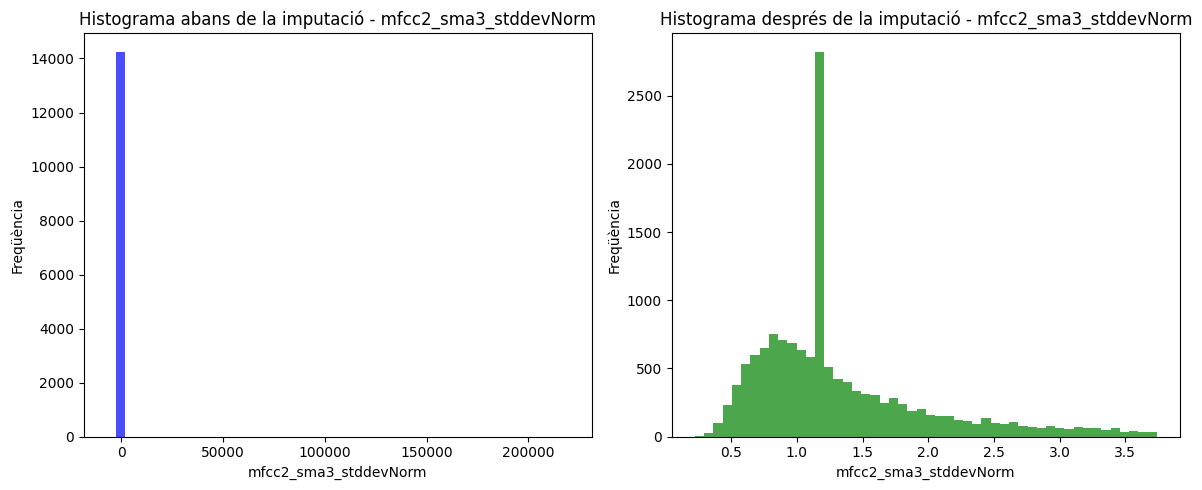


Processant columna: mfcc3_sma3_amean
  - Outliers substituïts per la mediana: 12.735782


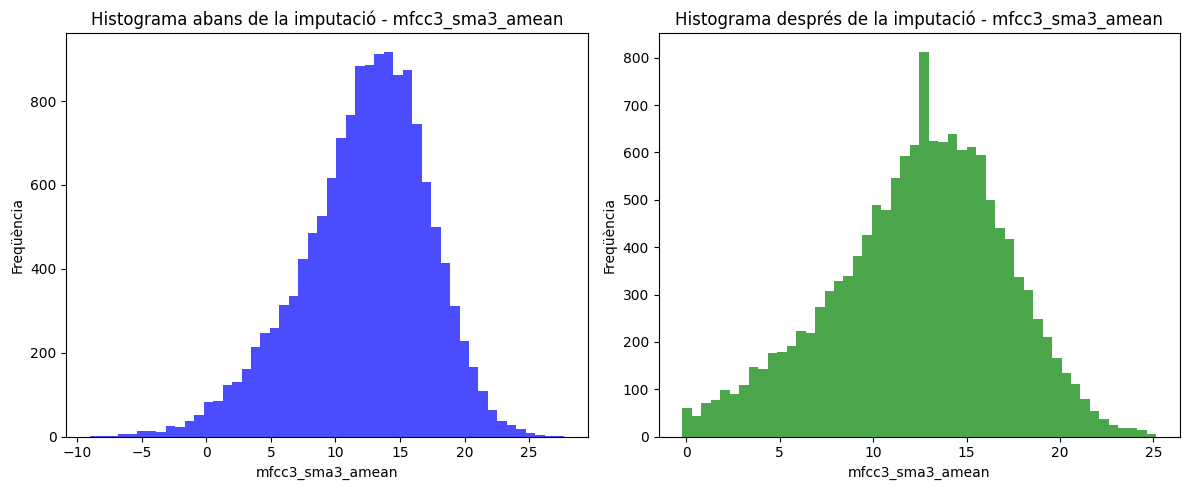


Processant columna: mfcc3_sma3_stddevNorm
  - Outliers substituïts per la mediana: 1.0659345


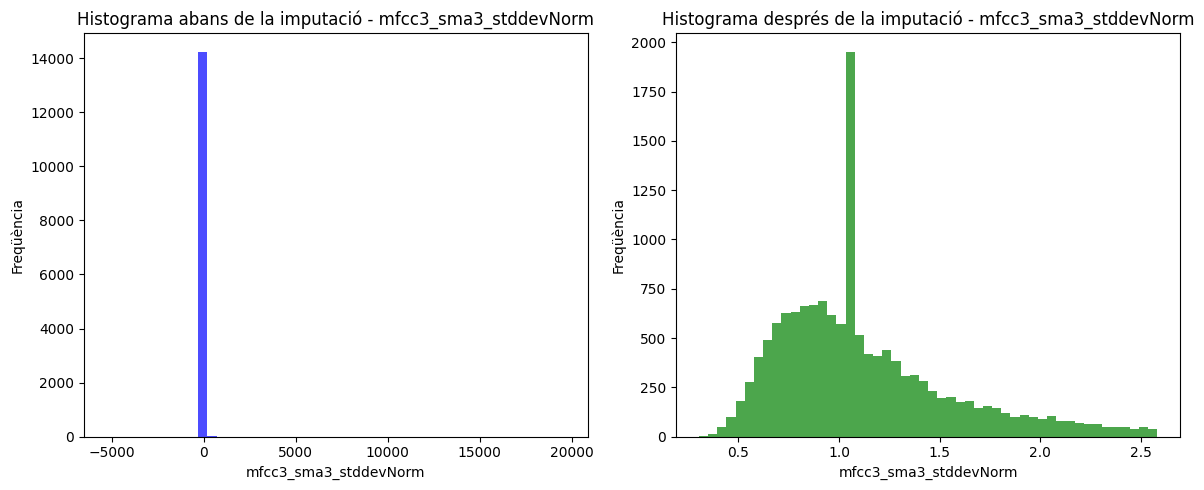


Processant columna: jitterLocal_sma3nz_amean
  - Outliers substituïts per la mediana: 0.019425027


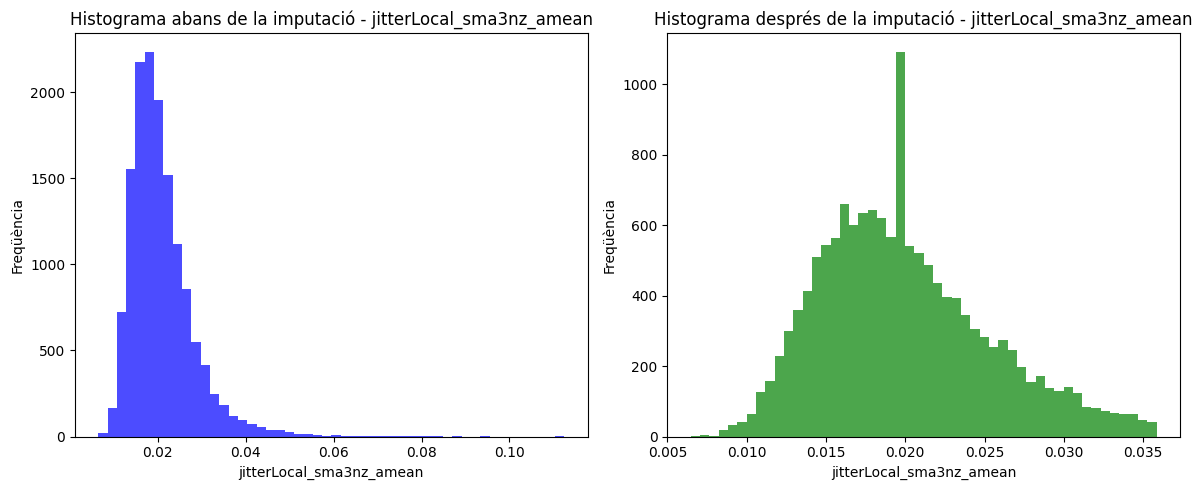


Processant columna: slopeUV500-1500_sma3nz_amean
  - Outliers substituïts per la mediana: 0.02206731


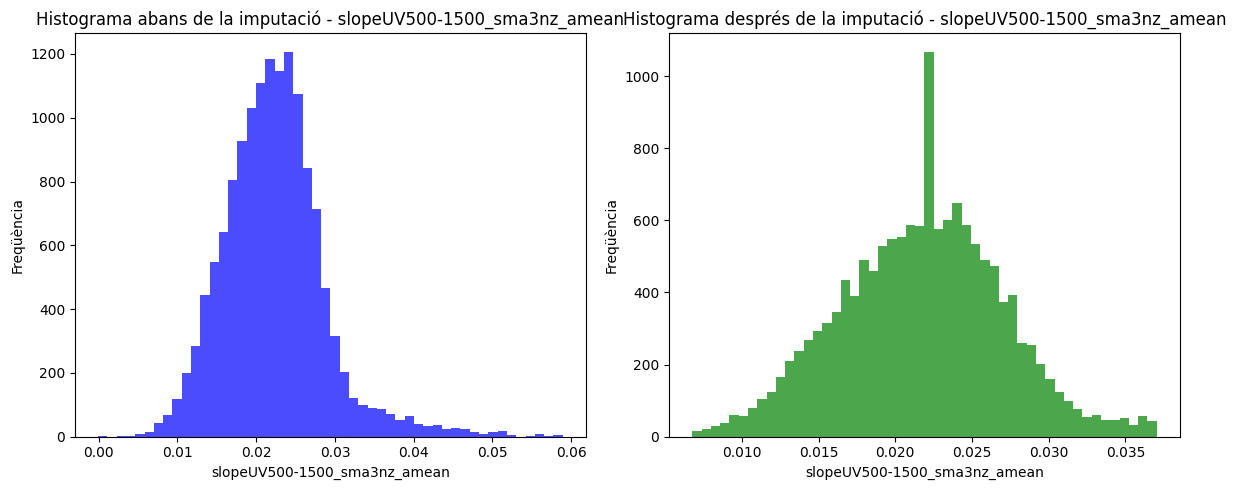


Processant columna: Realornot
  - Outliers substituïts per la mediana: 1.0


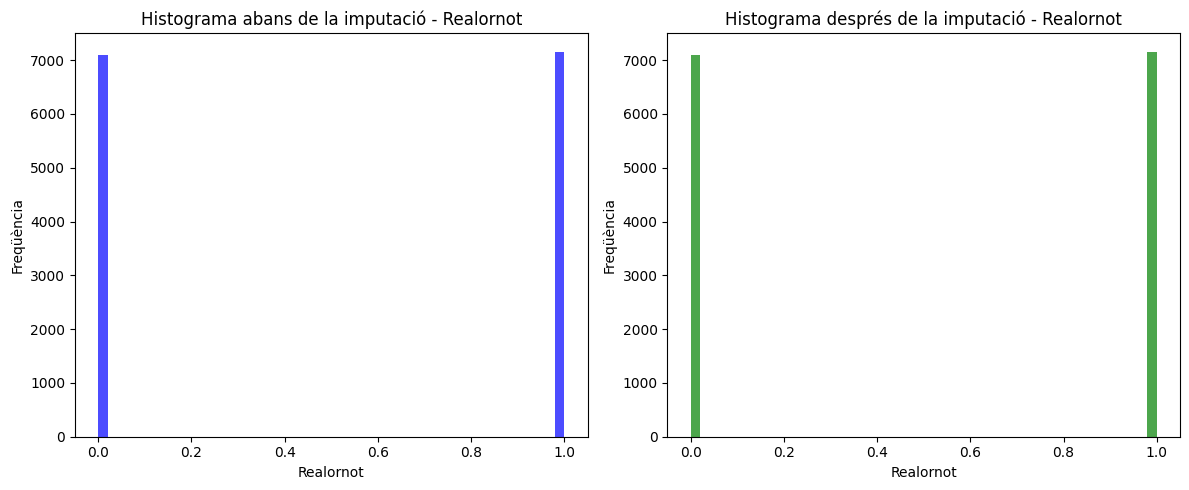

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Llista de variables per aplicar transformació logarítmica
log_transform_columns = [
    'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
    'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope'
]

numeric_columns = train_csv_1.select_dtypes(include=['number']).columns

for column in numeric_columns:
    print(f"\nProcessant columna: {column}")
    
    # Aplicar transformació logarítmica si la columna està a la llista
    if column in log_transform_columns:
        train_csv_1[column + '_log'] = np.log1p(train_csv_1[column])
        column_to_process = column + '_log'  
    else:
        column_to_process = column  
    
    # Calcular Q1, Q3 i IQR
    Q1 = train_csv_1[column_to_process].quantile(0.25)
    Q3 = train_csv_1[column_to_process].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular valors de tall per detectar outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    original_values = train_csv_1[column].copy()
    
    # Substituir els outliers per la mediana
    median = train_csv_1[column_to_process].median()
    train_csv_1.loc[
        (train_csv_1[column_to_process] < lower_bound) | (train_csv_1[column_to_process] > upper_bound),
        column_to_process
    ] = median

    print(f"  - Outliers substituïts per la mediana: {median}")
    
    # Gràfics d'histogrames abans i després de la imputació
    plt.figure(figsize=(12, 5))
    
    # Histograma abans de la imputació
    plt.subplot(1, 2, 1)
    plt.hist(original_values, bins=50, alpha=0.7, color='blue')
    plt.title(f'Histograma abans de la imputació - {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    
    # Histograma després de la imputació 
    plt.subplot(1, 2, 2)
    plt.hist(train_csv_1[column_to_process], bins=50, alpha=0.7, color='green')
    plt.title(f'Histograma després de la imputació - {column_to_process}')
    plt.xlabel(column_to_process)
    plt.ylabel('Freqüència')
    
    plt.tight_layout()
    plt.show()


In [32]:
for column in numeric_columns:
    if column in log_transform_columns:
        column_to_process = column + '_log'
        # Substituir els valors originals amb els transformats i imputats
        train_csv_1[column] = np.expm1(train_csv_1[column_to_process])  
        train_csv_1.drop(columns=[column_to_process], inplace=True)  
    else:
        column_to_process = column  

train_csv_1.to_csv("train_csv_1_imputed.csv", index=False)


In [33]:
val_csv = pd.read_csv("./val_df.csv")
numeric_columns = val_csv.select_dtypes(include=['number']).columns

for column in numeric_columns:
    print(f"\nProcessant columna: {column}")
    
    # Calcular Q1, Q3 i IQR
    Q1 = val_csv[column].quantile(0.25)
    Q3 = val_csv[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular valors de tall per detectar outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    print(f"  - Q1 (25%): {Q1}")
    print(f"  - Q3 (75%): {Q3}")
    print(f"  - IQR: {IQR}")
    print(f"  - Valors fora de rang: < {lower_bound} o > {upper_bound}")
    
    # Identificar outliers per sota i per sobre dels límits
    small_outliers = (val_csv[column] < lower_bound).sum()
    big_outliers = (val_csv[column] > upper_bound).sum()
    
    print(f"  - Outliers per sota: {small_outliers}")
    print(f"  - Outliers per sobre: {big_outliers}")



Processant columna: F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope
  - Q1 (25%): 30.713602
  - Q3 (75%): 141.74506
  - IQR: 111.03145799999999
  - Valors fora de rang: < -135.83358499999997 o > 308.292247
  - Outliers per sota: 0
  - Outliers per sobre: 160

Processant columna: F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope
  - Q1 (25%): 17.248209
  - Q3 (75%): 34.556507
  - IQR: 17.308298000000004
  - Valors fora de rang: < -8.714238000000005 o > 60.51895400000001
  - Outliers per sota: 80
  - Outliers per sobre: 390

Processant columna: F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope
  - Q1 (25%): 8.781565
  - Q3 (75%): 24.987265
  - IQR: 16.2057
  - Valors fora de rang: < -15.526985 o > 49.295815000000005
  - Outliers per sota: 0
  - Outliers per sobre: 529

Processant columna: loudness_sma3_amean
  - Q1 (25%): 0.31901413
  - Q3 (75%): 0.5923144
  - IQR: 0.27330027
  - Valors fora de rang: < -0.09093627500000001 o > 1.002264805
  - Outliers per sota: 0
  - Outliers per sobre: 156

Proc

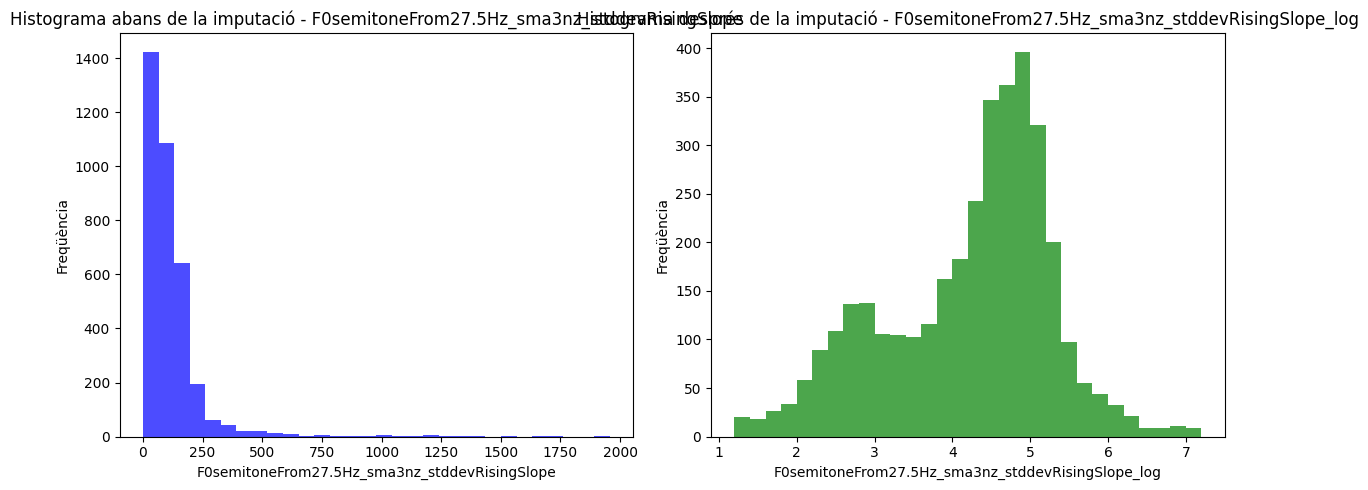

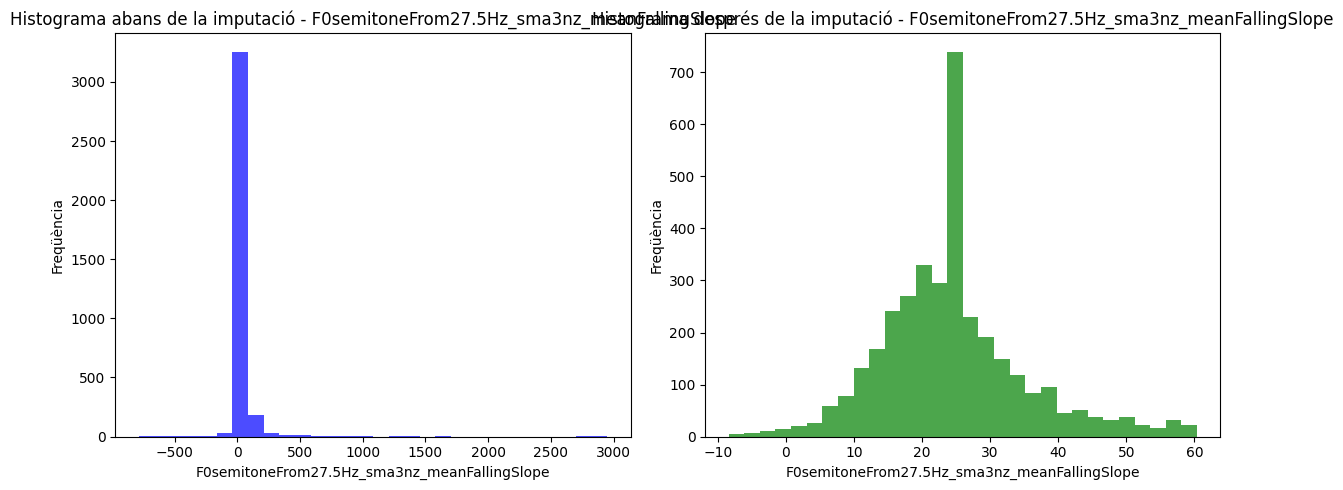

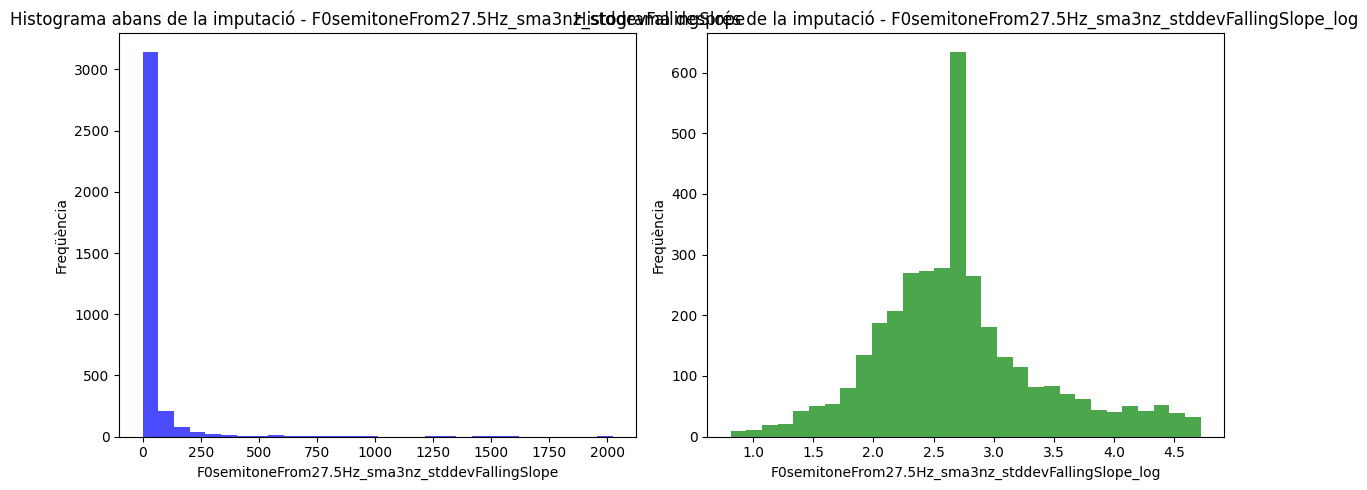

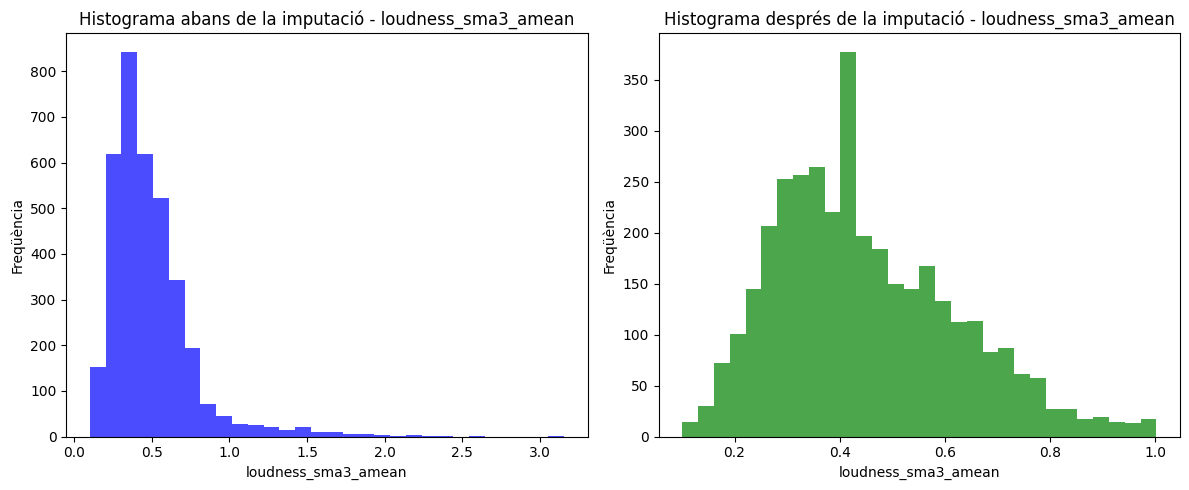

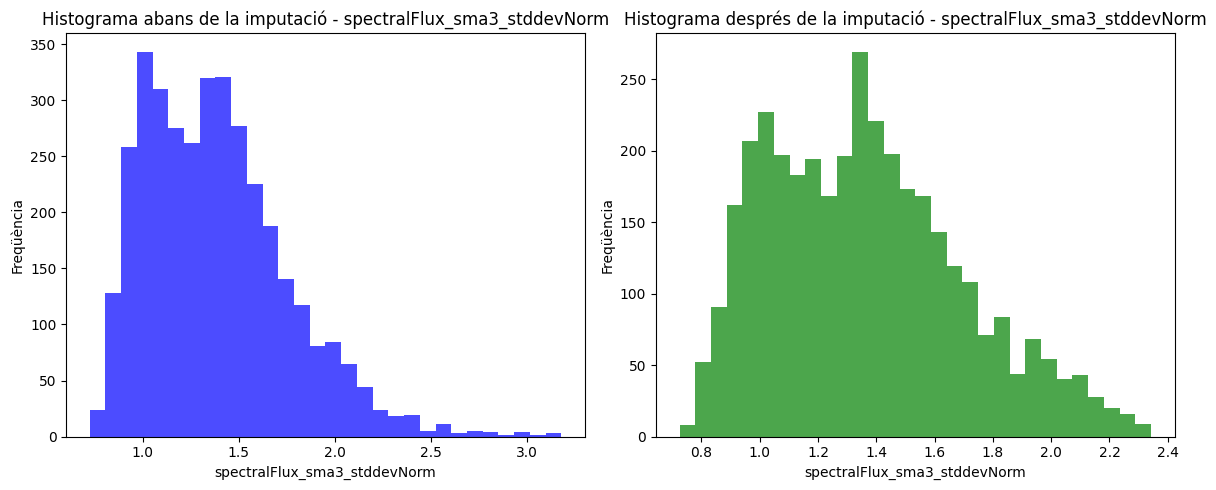

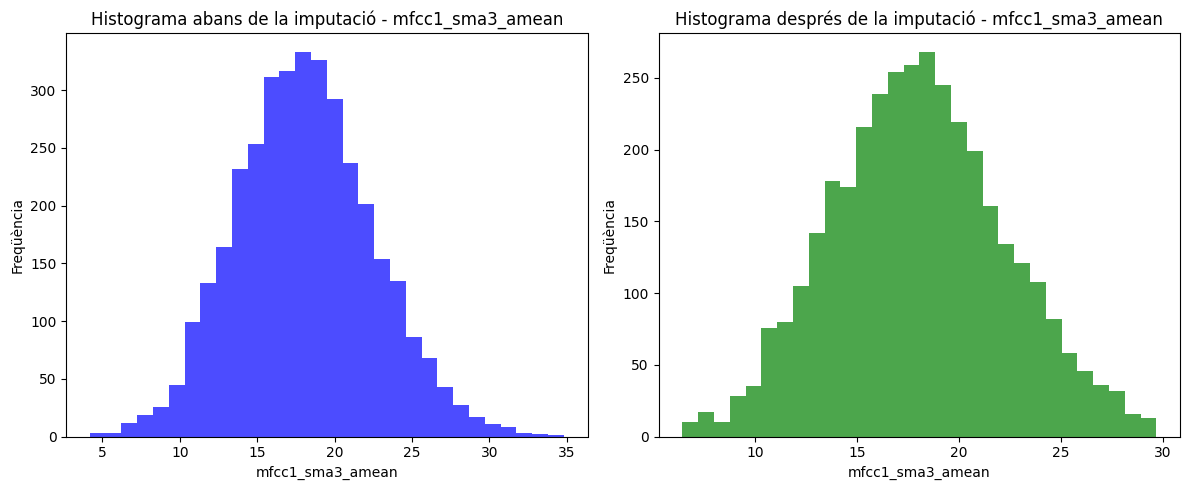

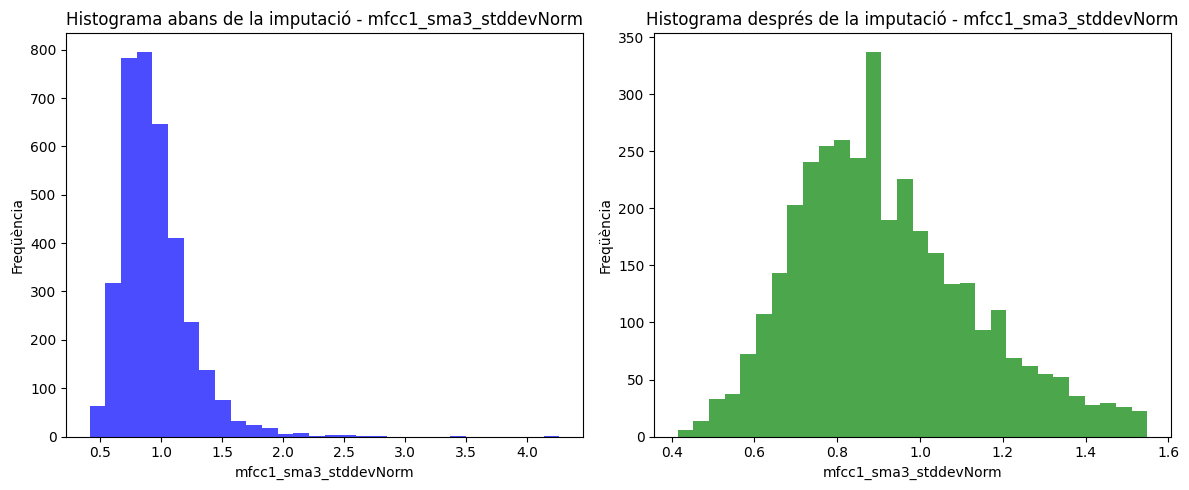

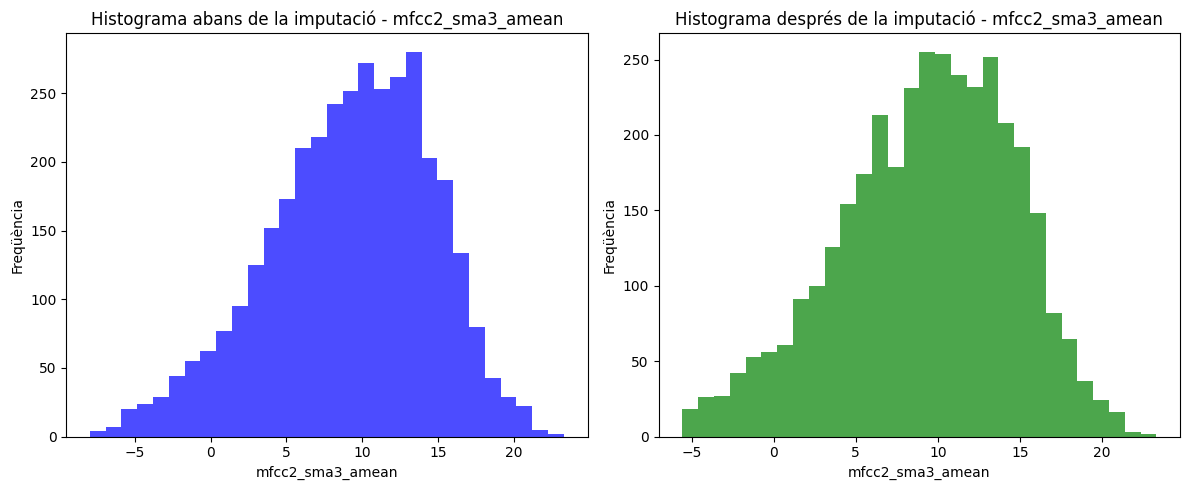

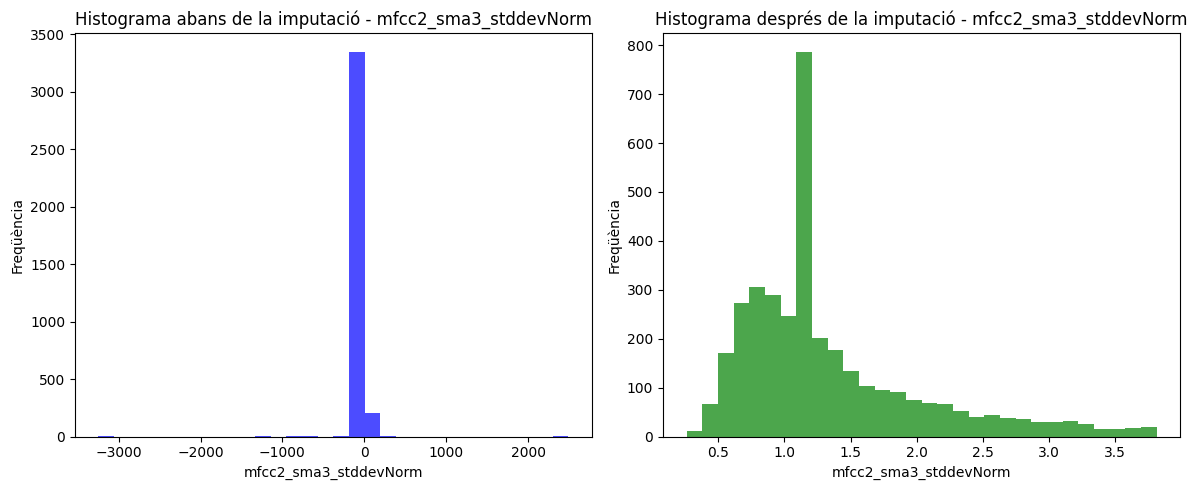

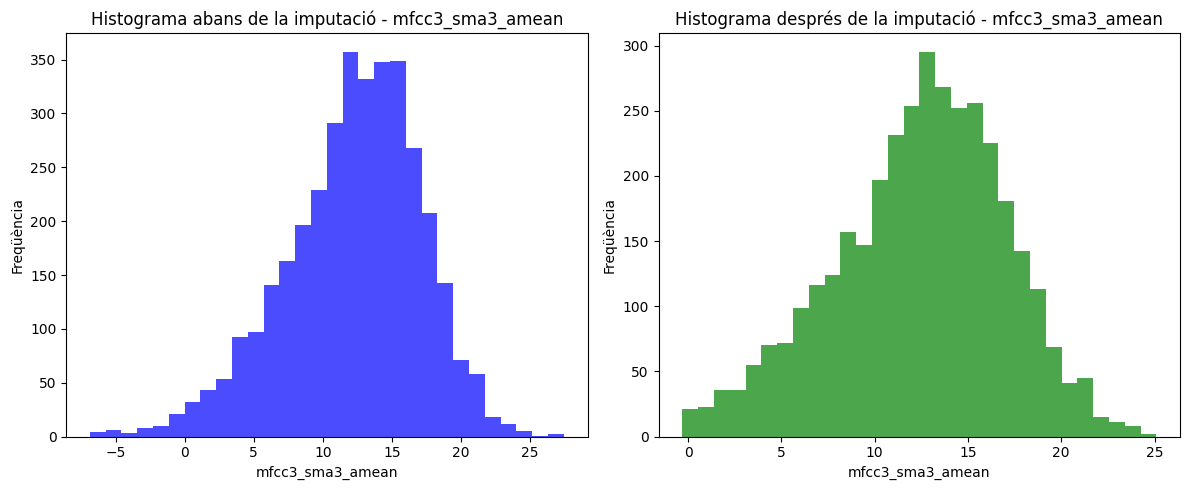

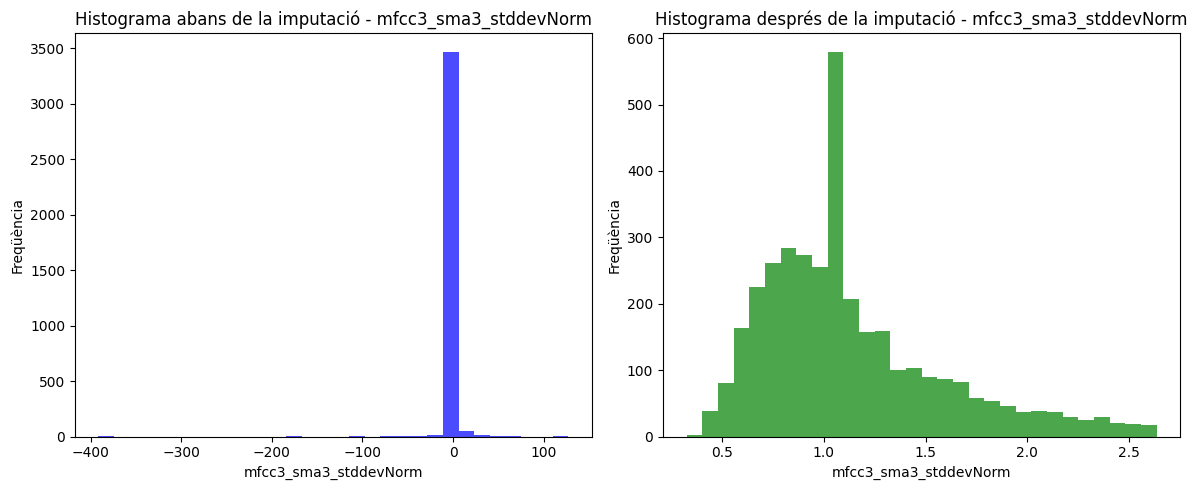

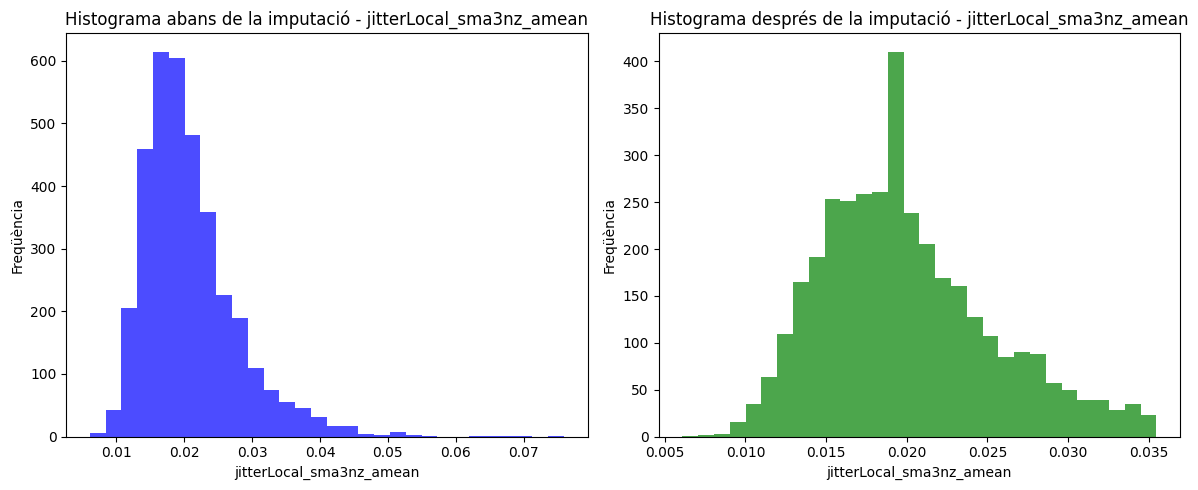

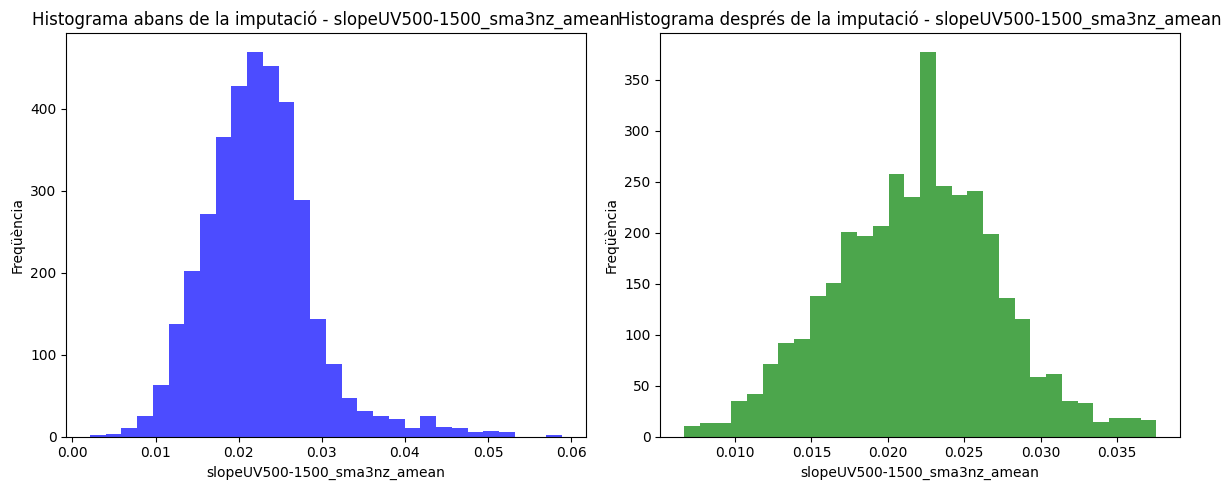

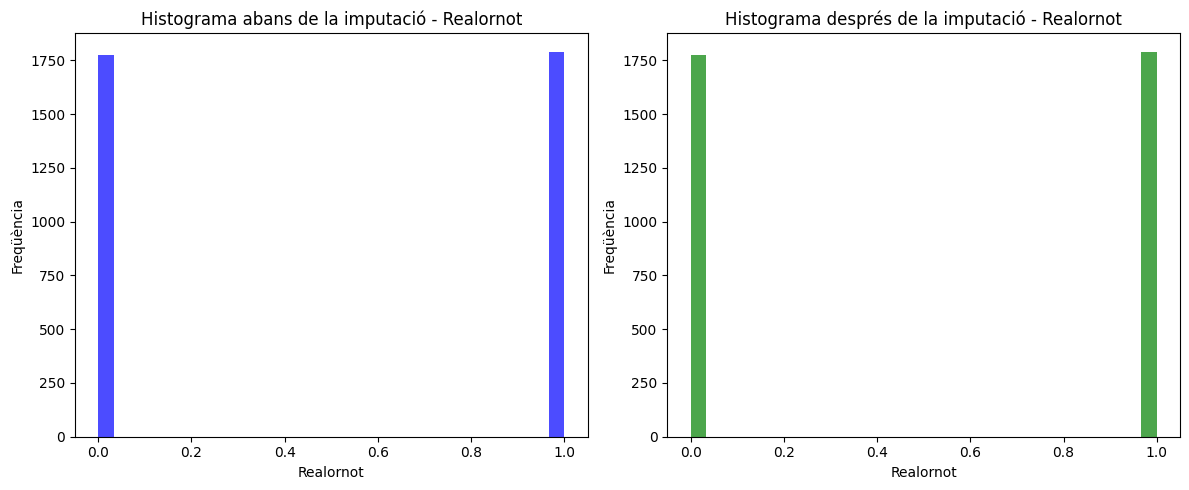

In [34]:
log_transform_columns = [
    'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
    'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope'
]

numeric_columns = val_csv.select_dtypes(include=['number']).columns

for column in numeric_columns:    
    if column in log_transform_columns:
        val_csv[column + '_log'] = np.log1p(val_csv[column])
        column_to_process = column + '_log'  
    else:
        column_to_process = column  
    
    # Calcular Q1, Q3 i IQR
    Q1 = val_csv[column_to_process].quantile(0.25)
    Q3 = val_csv[column_to_process].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    original_values = val_csv[column].copy()
    
    # Substituir outliers per la mediana
    median = val_csv[column_to_process].median()
    val_csv.loc[
        (val_csv[column_to_process] < lower_bound) | (val_csv[column_to_process] > upper_bound),
        column_to_process
    ] = median

    # Gràfics d'histogrames abans i després de la imputació
    plt.figure(figsize=(12, 5))
    
    # Histograma abans de la imputació
    plt.subplot(1, 2, 1)
    plt.hist(original_values, bins=30, alpha=0.7, color='blue')
    plt.title(f'Histograma abans de la imputació - {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    
    # Histograma després de la imputació (transformada si aplica)
    plt.subplot(1, 2, 2)
    plt.hist(val_csv[column_to_process], bins=30, alpha=0.7, color='green')
    plt.title(f'Histograma després de la imputació - {column_to_process}')
    plt.xlabel(column_to_process)
    plt.ylabel('Freqüència')
    
    plt.tight_layout()
    plt.show()


In [35]:
for column in numeric_columns:
    if column in log_transform_columns:
        column_to_process = column + '_log'
        
        val_csv[column] = np.expm1(val_csv[column_to_process])  
        val_csv.drop(columns=[column_to_process], inplace=True)
    else:
        column_to_process = column 

val_csv.to_csv("val_df_imputed.csv", index=False)

### 1.5 Recodificació de variables

APLICAR ONE HOT ENCODING PER A LES VARIABLES CATEGÒRIQUES

In [36]:
from sklearn.preprocessing import OneHotEncoder

train_csv_1 = pd.read_csv("./train_csv_1_imputed.csv")
columns_to_encode = ['Final_sex', 'Final_country']  

data_to_encode = train_csv_1[columns_to_encode]

encoder = OneHotEncoder(sparse_output=False)  

encoded_data = encoder.fit_transform(data_to_encode)

encoded_columns = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

train_csv_1 = pd.concat([train_csv_1.drop(columns=columns_to_encode), encoded_df], axis=1)
train_csv_1.head()


,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,Realornot,Final_sex_Female,Final_sex_Male,Final_country_Argentina,Final_country_Chile,Final_country_Colombia,Final_country_Peru,Final_country_Venezuela
0,114.550520,25.626345,28.630450,0.458604,1.381651,23.938280,0.649579,11.692818,0.896338,13.226121,...,0.015036,0.020018,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,26.689714,24.284646,13.630733,0.334295,1.922428,13.940374,1.032208,13.390848,1.140205,10.643297,...,0.029346,0.023459,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,98.376000,21.694504,12.566723,0.468255,1.301961,19.693083,0.762561,6.794200,2.528780,9.388177,...,0.019788,0.019014,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,196.479260,24.284646,13.630733,0.651946,0.969091,26.304860,0.685982,10.949346,0.998904,10.903319,...,0.019064,0.012776,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,173.466080,27.026033,4.788605,0.958504,1.376758,14.628552,0.945577,10.889606,0.882619,12.746132,...,0.022304,0.019813,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [37]:
columns_to_encode = ['Final_sex', 'Final_country']
val_csv = pd.read_csv("./val_df_imputed.csv")
data_to_encode = val_csv[columns_to_encode]

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data_to_encode)
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
val_csv = pd.concat([val_csv.drop(columns=columns_to_encode), encoded_df], axis=1)
val_csv.head()


,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,Realornot,Final_sex_Female,Final_sex_Male,Final_country_Argentina,Final_country_Chile,Final_country_Colombia,Final_country_Peru,Final_country_Venezuela
0,18.611395,25.438095,7.178744,0.399221,1.381376,17.244150,1.008665,13.780508,0.736732,17.198692,...,0.033509,0.023628,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,97.071350,22.172363,8.290317,0.685127,0.972903,17.999735,1.087042,8.188943,1.748665,6.679542,...,0.017606,0.036770,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,110.492480,31.489939,13.320490,0.894024,1.016733,23.242935,0.698181,5.515309,2.543695,13.372943,...,0.021711,0.015140,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,89.668910,14.798450,8.173624,0.367669,1.452846,16.818068,0.855015,8.805589,1.673958,6.660698,...,0.016420,0.025118,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1053.285800,24.000278,13.510465,0.444806,1.241398,20.081215,0.954065,11.105152,1.318291,17.346170,...,0.017368,0.015044,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
val_csv.to_csv("val_df_imputed.csv", index=False)
train_csv_1.to_csv("train_csv_1_imputed.csv", index=False)

### 1.6 Preparació de test

REALITZAR LES MATEIXES IMPUTACIONS FETES PER TRAIN I VAL, ARA A TEST

In [39]:
merged_test.head()

,F_path_x,Category,Source_ID_x,Target_ID_x,Source_Sex_x,Source_Country_x,Target_Sex_x,Target_Country_x,ID_x,Sex_x,...,Target_Sex_y,Target_Country_y,Sex_y,Country_y,Source_Utterance,Target_Utterance,Utterance,Variant,Transcription,Times
0,FinalDataset_16khz/Real/Argentina/arf_07060/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_07060,Female,...,NaN,NaN,Female,Argentina,NaN,NaN,1.060809e+09,NaN,øQuiere que le proporcione la direcciÛn electr...,18
1,FinalDataset_16khz/Real/Argentina/arf_07060/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_07060,Female,...,NaN,NaN,Female,Argentina,NaN,NaN,2.139970e+09,NaN,"En el estadio, va a hacer mucho fr√≠",7
2,FinalDataset_16khz/Real/Argentina/arf_07060/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_07060,Female,...,NaN,NaN,Female,Argentina,NaN,NaN,1.293921e+09,NaN,Esa palabra viene del griego cl√°sic,100
3,FinalDataset_16khz/Real/Argentina/arf_07060/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_07060,Female,...,NaN,NaN,Female,Argentina,NaN,NaN,1.141051e+09,NaN,øLas ruedas van en la parte de atr·s o en la p...,53
4,FinalDataset_16khz/Real/Argentina/arf_07060/ar...,Real,NaN,NaN,NaN,NaN,NaN,NaN,arf_07060,Female,...,NaN,NaN,Female,Argentina,NaN,NaN,1.742611e+09,NaN,Lo pod√©s pagar con la tarjeta oro de Mastercar,10


In [40]:
merged_test.columns

Index(['F_path_x', 'Category', 'Source_ID_x', 'Target_ID_x', 'Source_Sex_x',
       'Source_Country_x', 'Target_Sex_x', 'Target_Country_x', 'ID_x', 'Sex_x',
       'Country_x', 'UniqueID', 'Realornot', 'Unnamed: 0',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'Filename', 'F_path_y', 'F1', 'F2',
       'F3', 'F4', 'ID_y', 'File_ID', 'Source_ID_y', 'File_Source_ID',
       'Target_ID_y', 'File_Target_ID', 'Source_Sex_y', 'Source_Country_y',
       'Target_Sex_y', 'Target_Country_y', 'Sex_y', 'Country_y',
       'Source_Utterance', 'Targe

In [41]:
columns_to_drop = [
    'File_ID', 
    'File_Source_ID', 
    'File_Target_ID', 
    'Source_Utterance', 
    'Target_Utterance', 
    'Utterance', 
    'Variant',
    'Category'
]

merged_test = merged_test.drop(columns=columns_to_drop)



In [42]:
duplicated_columns = merged_test.T.duplicated()

duplicated_column_names = merged_test.columns[duplicated_columns].tolist()

duplicated_column_names


['F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1',
 'F_path_y',
 'ID_y',
 'Source_ID_y',
 'Target_ID_y',
 'Source_Sex_y',
 'Source_Country_y',
 'Target_Sex_y',
 'Target_Country_y',
 'Sex_y',
 'Country_y']

In [43]:
merged_test = merged_test.loc[:, ~merged_test.T.duplicated()]

merged_test.columns

Index(['F_path_x', 'Source_ID_x', 'Target_ID_x', 'Source_Sex_x',
       'Source_Country_x', 'Target_Sex_x', 'Target_Country_x', 'ID_x', 'Sex_x',
       'Country_x', 'UniqueID', 'Realornot', 'Unnamed: 0',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'Filename', 'F1', 'F2', 'F3', 'F4',
       'Transcription', 'Times'],
      dtype='object')

In [44]:
columns_to_drop = [
    'Filename', 'F1', 'F2', 'F3', 'F4',
    'F_path_x', 'Source_ID_x', 'Target_ID_x',
    'Transcription', 'Times','Unnamed: 0','Source_Sex_x',
    'Source_Country_x','ID_x','UniqueID'
]

merged_test =merged_test.drop(columns=columns_to_drop, errors='ignore')

In [45]:
##MISSINGS
missings = merged_test.isnull().sum()
missings = missings[missings > 0]
missings

Target_Sex_x        1200
Target_Country_x    1200
Sex_x               1172
Country_x           1172
dtype: int64

In [46]:
merged_test['Final_sex'] = merged_test['Sex_x'].combine_first(merged_test['Target_Sex_x'])
merged_test['Final_country'] = merged_test['Country_x'].combine_first(merged_test['Target_Country_x'])

merged_test.drop(['Target_Sex_x', 'Target_Country_x', 'Sex_x', 'Country_x'], axis=1, inplace=True)
merged_test.to_csv('./merged_test.csv', index=False)
merged_test.head()

,Realornot,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,Final_sex,Final_country
0,1,82.441086,21.196049,15.090245,0.446090,1.173893,22.906178,0.691432,7.494303,2.075078,16.127365,0.903348,0.017495,0.015111,Female,Argentina
1,1,4.898601,29.415117,23.631758,0.438447,1.208798,21.058222,0.734790,11.876312,1.329829,14.812564,1.101144,0.012679,0.020594,Female,Argentina
2,1,20.743052,25.460447,9.126817,0.433276,1.211568,21.528429,0.699225,11.194599,1.351651,15.198386,1.067746,0.012571,0.015984,Female,Argentina
3,1,54.955902,27.324966,12.697560,0.512443,1.135916,22.416296,0.623667,6.489924,2.612258,12.993800,1.192059,0.029118,0.020474,Female,Argentina
4,1,59.542282,19.921278,7.945864,0.520452,1.123926,24.588675,0.605315,4.764306,3.644973,6.489363,2.621757,0.015645,0.012001,Female,Argentina


In [47]:
def count_zeros(dataset):
    zero_counts = {}
    
    for column in dataset.columns:
        zero_count = (dataset[column] == 0.00).sum()
        zero_counts[column] = zero_count
    
    zero_counts_df = pd.DataFrame(list(zero_counts.items()), columns=['Column', 'Zero_Count'])
    
    return zero_counts_df

numeric_columns_without_realornot_test = merged_test.select_dtypes(include=['number']).columns.difference(['Realornot'])
zero_counts_test = count_zeros(merged_test[numeric_columns_without_realornot_test])
zero_counts_test


,Column,Zero_Count
0,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,2
1,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,53
2,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,23
3,jitterLocal_sma3nz_amean,0
4,loudness_sma3_amean,0
5,mfcc1_sma3_amean,0
6,mfcc1_sma3_stddevNorm,0
7,mfcc2_sma3_amean,0
8,mfcc2_sma3_stddevNorm,0
9,mfcc3_sma3_amean,0


In [49]:
def count_zeros_and_impute(dataset):
    zero_counts = {}
    numeric_columns_without_realornot = dataset.select_dtypes(include=['number']).columns.difference(['Realornot'])

    for column in numeric_columns_without_realornot:
        zero_count = (dataset[column] == 0.00).sum()
        zero_counts[column] = zero_count
        dataset[column] = dataset[column].replace(0.000, pd.NA)
        median_value = dataset[column].median()
        dataset[column] = dataset[column].fillna(median_value)

    zero_counts_df = pd.DataFrame(list(zero_counts.items()), columns=['Column', 'Zero_Count'])
    return zero_counts_df, dataset

zero_counts_test, merged_test_imputed = count_zeros_and_impute(merged_test)
zero_counts_test


,Column,Zero_Count
0,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,0
1,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,0
2,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,0
3,jitterLocal_sma3nz_amean,0
4,loudness_sma3_amean,0
5,mfcc1_sma3_amean,0
6,mfcc1_sma3_stddevNorm,0
7,mfcc2_sma3_amean,0
8,mfcc2_sma3_stddevNorm,0
9,mfcc3_sma3_amean,0


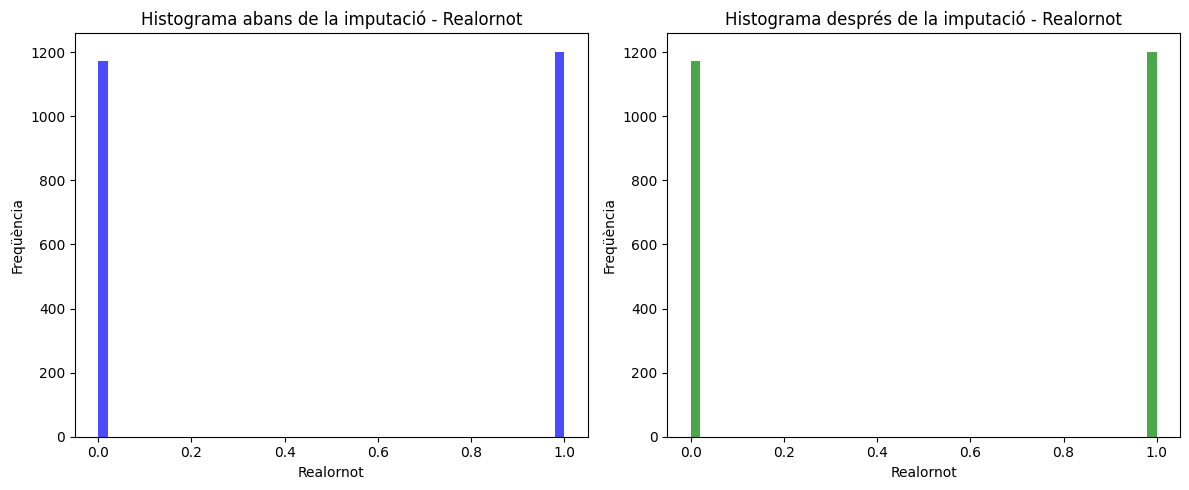

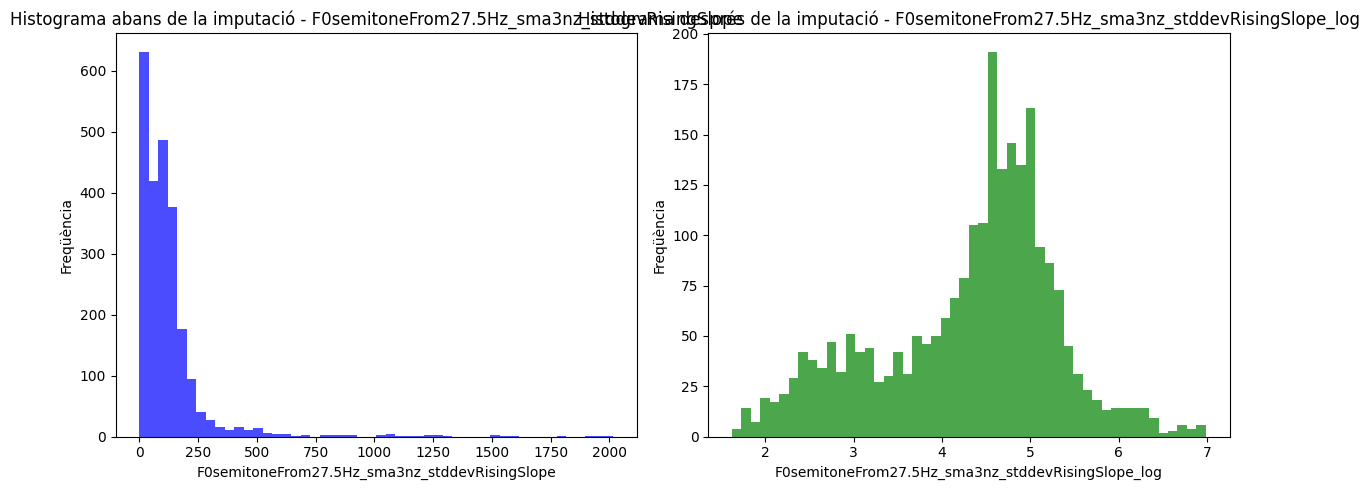

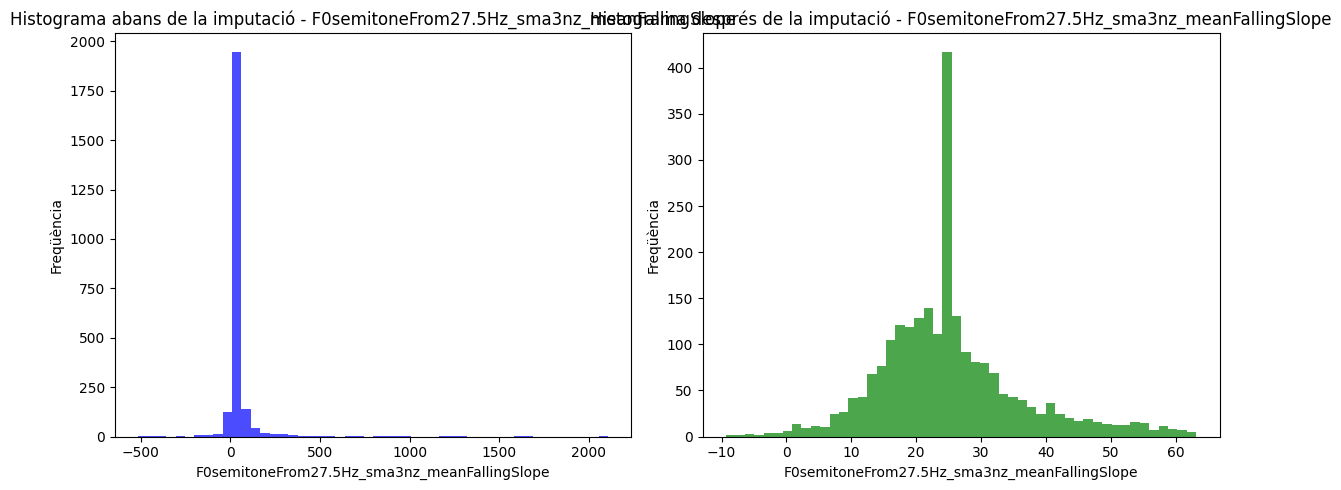

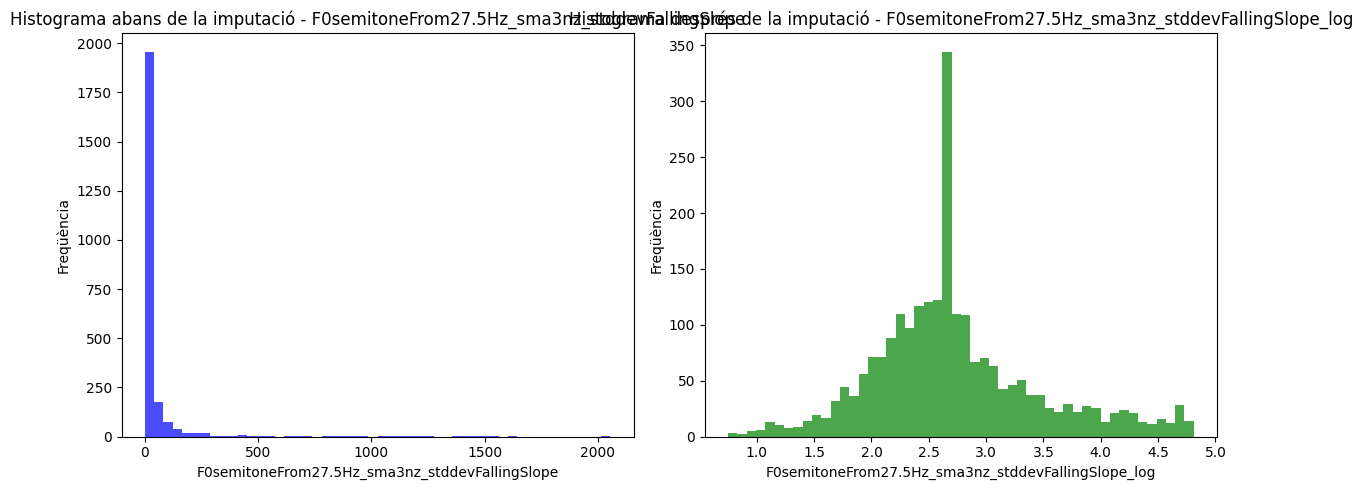

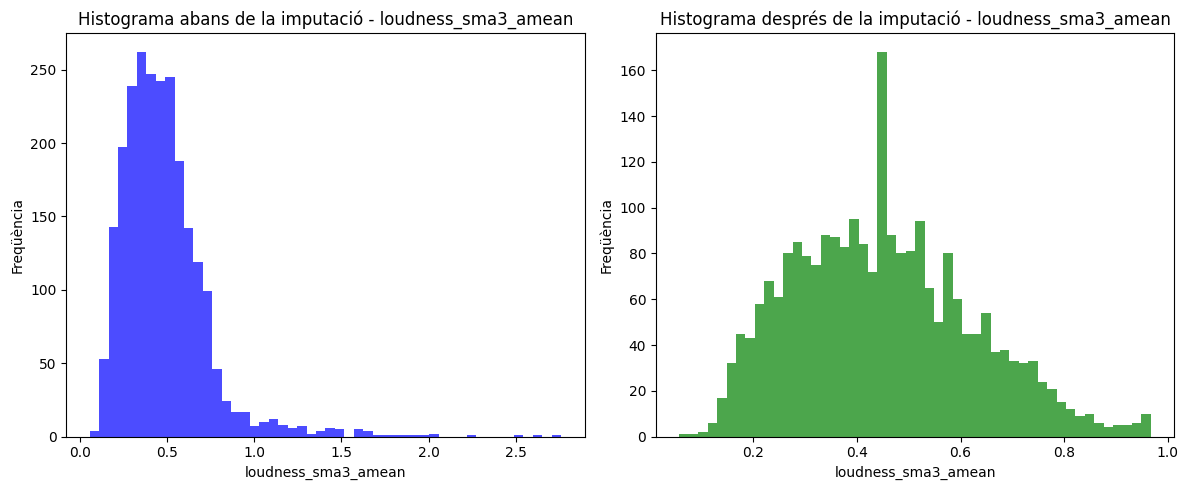

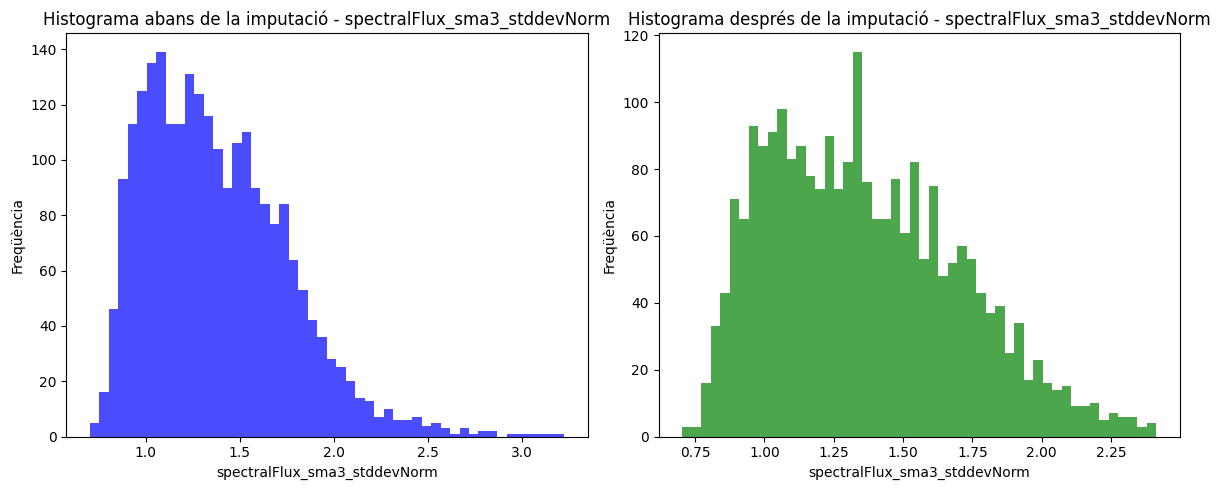

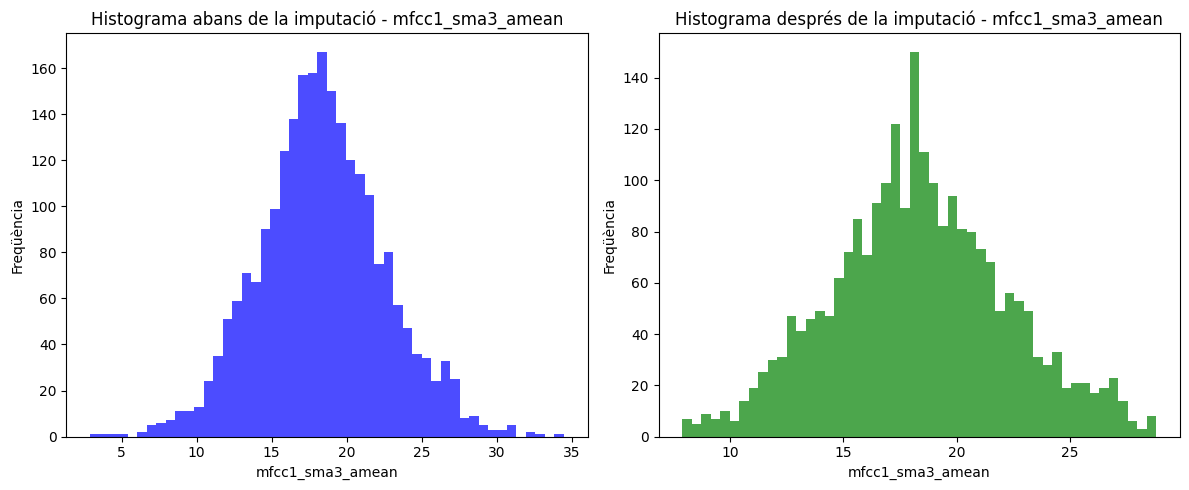

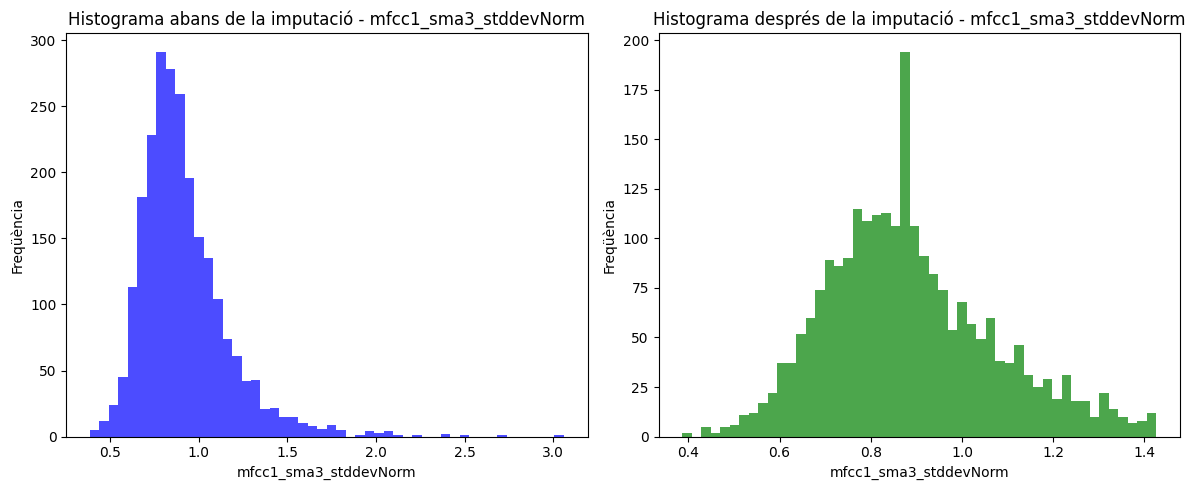

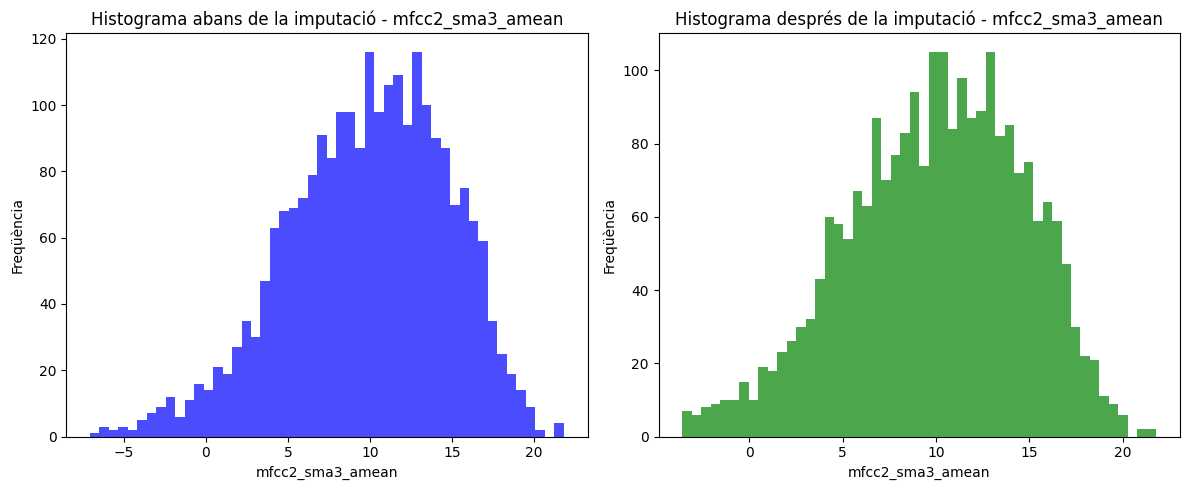

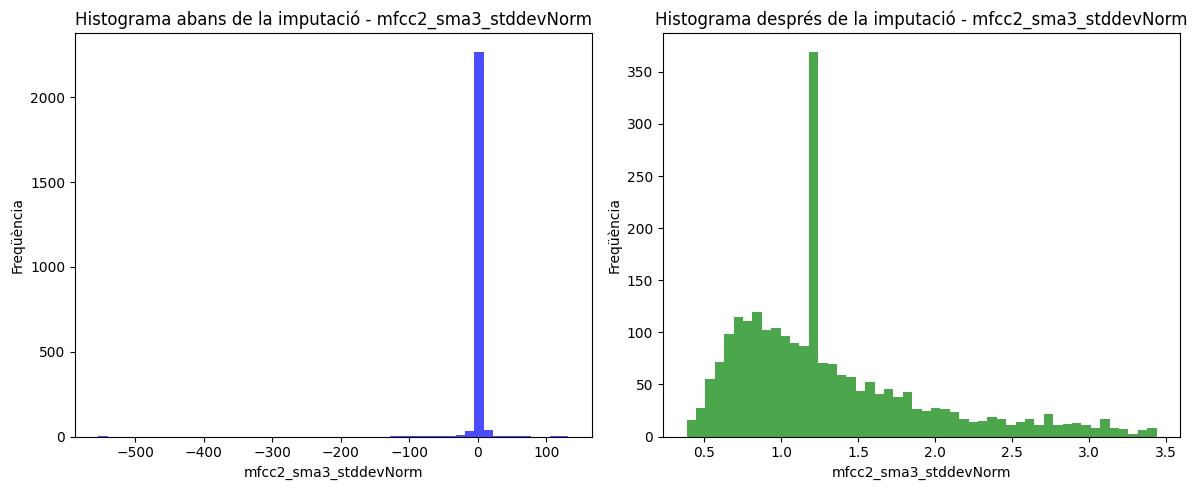

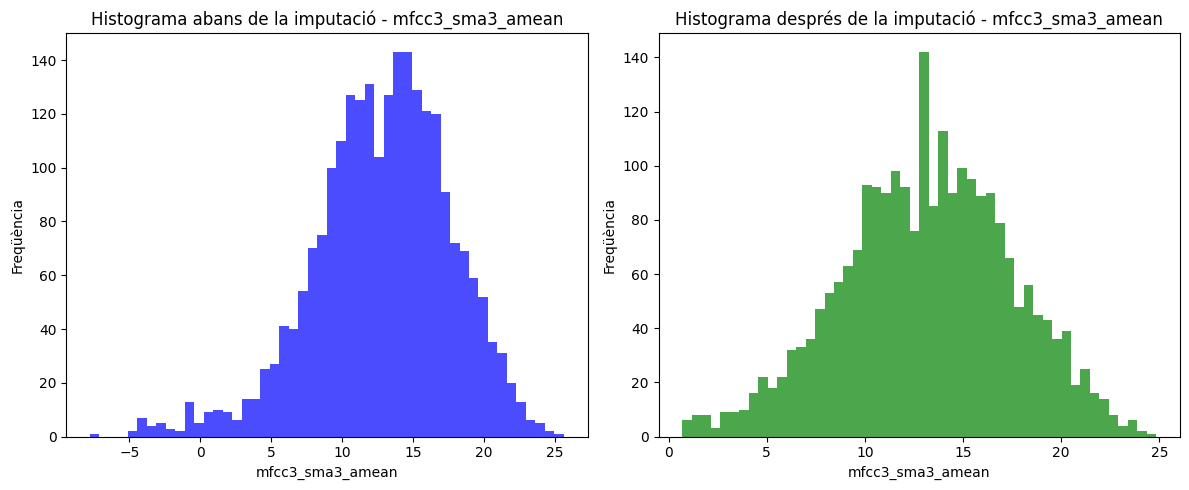

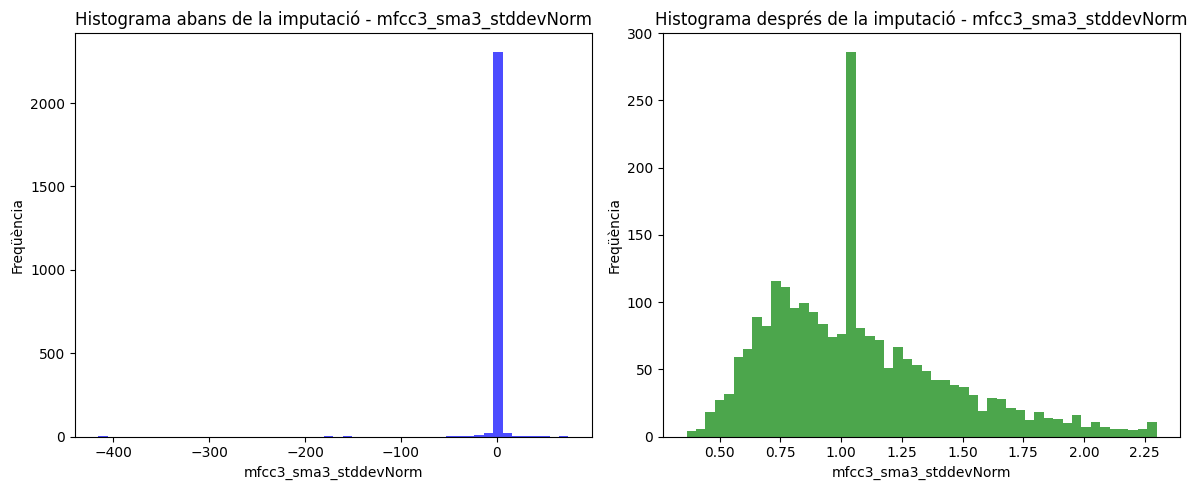

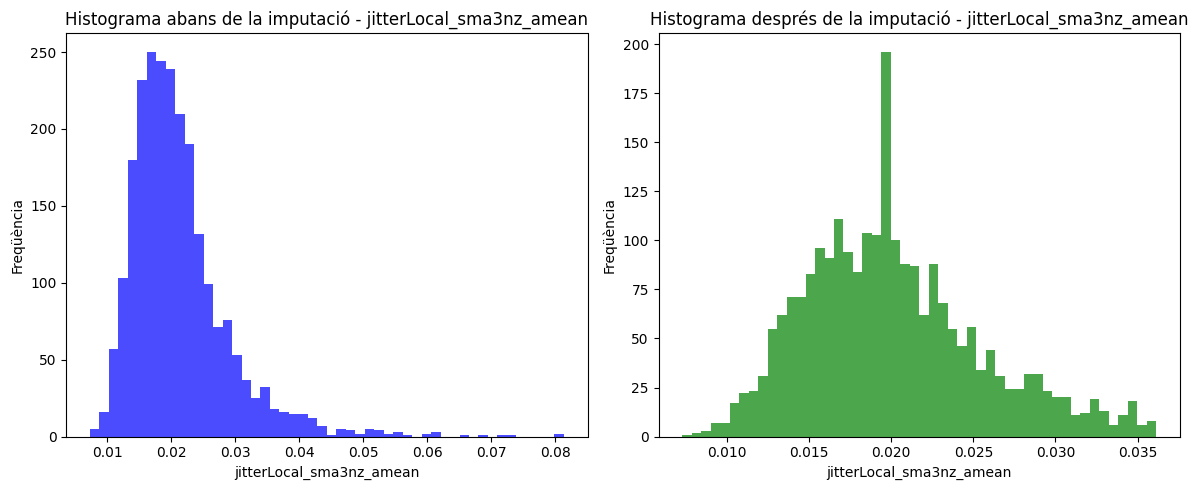

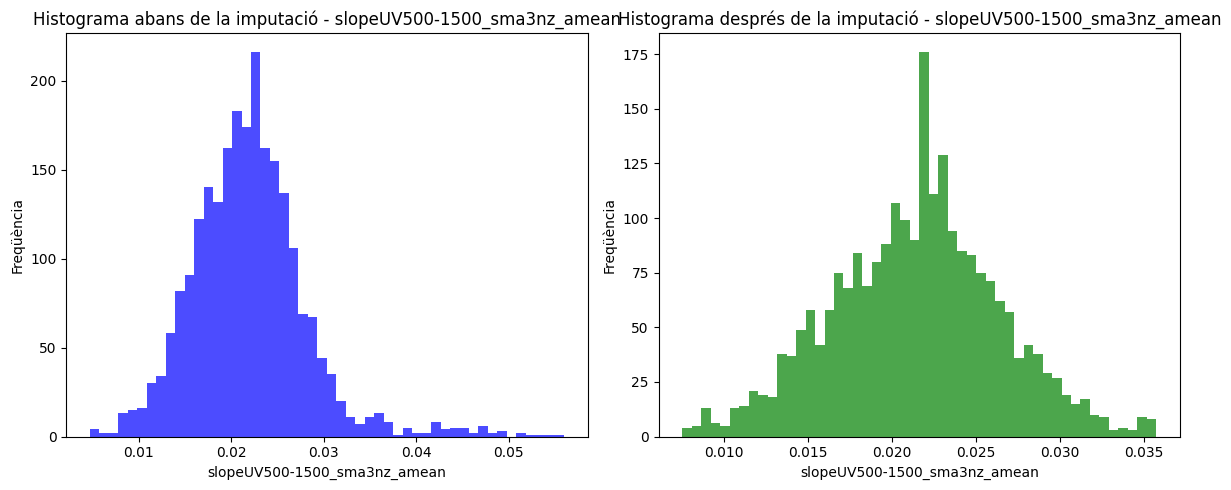

In [50]:
log_transform_columns = [
    'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
    'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope'
]

numeric_columns = merged_test.select_dtypes(include=['number']).columns

for column in numeric_columns:
    if column in log_transform_columns:
        merged_test[column + '_log'] = np.log1p(merged_test[column])
        column_to_process = column + '_log'
    else:
        column_to_process = column
    
    Q1 = merged_test[column_to_process].quantile(0.25)
    Q3 = merged_test[column_to_process].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    original_values = merged_test[column].copy()
    median = merged_test[column_to_process].median()
    merged_test.loc[
        (merged_test[column_to_process] < lower_bound) | (merged_test[column_to_process] > upper_bound),
        column_to_process
    ] = median

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(original_values, bins=50, alpha=0.7, color='blue')
    plt.title(f'Histograma abans de la imputació - {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.subplot(1, 2, 2)
    plt.hist(merged_test[column_to_process], bins=50, alpha=0.7, color='green')
    plt.title(f'Histograma després de la imputació - {column_to_process}')
    plt.xlabel(column_to_process)
    plt.ylabel('Freqüència')
    plt.tight_layout()
    plt.show()


In [51]:
# Iterar sobre todas las columnas numéricas
for column in numeric_columns:
    if column in log_transform_columns:
        column_to_process = column + '_log'
        
        merged_test[column] = np.expm1(merged_test[column_to_process])  
        merged_test.drop(columns=[column_to_process], inplace=True)  
    else:
        column_to_process = column  

merged_test.to_csv("merged_test.csv", index=False)

In [52]:
columns_to_encode = ['Final_sex', 'Final_country'] 

data_to_encode = merged_test[columns_to_encode]

encoder = OneHotEncoder(sparse_output=False) 

encoded_data = encoder.fit_transform(data_to_encode)

encoded_columns = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

merged_test = pd.concat([merged_test.drop(columns=columns_to_encode), encoded_df], axis=1)
merged_test.head()

,Realornot,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,...,mfcc3_sma3_stddevNorm,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,Final_sex_Female,Final_sex_Male,Final_country_Argentina,Final_country_Chile,Final_country_Colombia,Final_country_Peru,Final_country_Venezuela
0,1,82.441086,21.196049,15.090245,0.446090,1.173893,22.906178,0.691432,7.494303,2.075078,...,0.903348,0.017495,0.015111,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,4.898601,29.415117,23.631758,0.438447,1.208798,21.058222,0.734790,11.876312,1.329829,...,1.101144,0.012679,0.020594,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,20.743052,25.460447,9.126817,0.433276,1.211568,21.528429,0.699225,11.194599,1.351651,...,1.067746,0.012571,0.015984,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,54.955902,27.324966,12.697560,0.512443,1.135916,22.416296,0.623667,6.489924,2.612258,...,1.192059,0.029118,0.020474,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,59.542282,19.921278,7.945864,0.520452,1.123926,24.588675,0.605315,4.764306,1.187124,...,1.026745,0.015645,0.012001,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
merged_test.to_csv("merged_test.csv", index=False)

In [54]:
from sklearn.preprocessing import StandardScaler
##NORMALITZAR ELS VALORS DE TEST, PER A TRAIN I VAL ES FA A LA SECCIÓ 2
categoricas = [ 
    'Final_sex_Female',
    'Final_sex_Male', 
    'Final_country_Argentina', 
    'Final_country_Chile',
    'Final_country_Colombia', 
    'Final_country_Peru',
    'Final_country_Venezuela'
    
]
numeric_columns = merged_test.select_dtypes(include=['number']).columns.difference(['Realornot']).difference(categoricas)
scaler = StandardScaler()

merged_test[numeric_columns] = scaler.fit_transform(merged_test[numeric_columns])
merged_test[numeric_columns].head()

,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,jitterLocal_sma3nz_amean,loudness_sma3_amean,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,slopeUV500-1500_sma3nz_amean,spectralFlux_sma3_stddevNorm
0,-0.355345,-0.222196,-0.262133,-0.478822,-0.013280,1.165219,-1.044420,-0.520191,1.232944,0.687602,-0.434535,-1.260304,-0.541866
1,0.390373,0.189483,-0.916347,-1.375909,-0.057627,0.693203,-0.810228,0.404750,0.036310,0.384347,0.095442,-0.158930,-0.439968
2,0.031565,-0.509618,-0.782670,-1.396044,-0.087631,0.813306,-1.002329,0.260856,0.071349,0.473336,0.005953,-1.085013,-0.431881
3,0.200733,-0.337517,-0.494021,1.686007,0.371713,1.040091,-1.410451,-0.732192,2.095484,-0.035145,0.339039,-0.183101,-0.652733
4,-0.471005,-0.566536,-0.455327,-0.823408,0.418178,1.594974,-1.509578,-1.096430,-0.192829,-1.535374,-0.103905,-1.885037,-0.687735


In [55]:
merged_test.to_csv("merged_test.csv", index=False)

# Aleatoritzar les files per evitar ordinalitat
test_csv_shuffled = merged_test.sample(frac=1).reset_index(drop=True)

test_csv_shuffled.to_csv('merged_test.csv', index=False)

In [56]:
test_csv_shuffled.head()

,Realornot,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,...,mfcc3_sma3_stddevNorm,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,Final_sex_Female,Final_sex_Male,Final_country_Argentina,Final_country_Chile,Final_country_Colombia,Final_country_Peru,Final_country_Venezuela
0,0,-0.838861,-0.018918,4.054190,-0.394381,-0.759351,-1.161834,1.539888,-1.778867,-0.192829,...,1.606548,-1.188768,1.198994,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,-0.915275,-0.292976,-0.184096,-0.628457,0.310163,-0.271619,-0.349816,0.346626,-0.383931,...,-0.730357,0.194196,0.497448,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0,-0.780849,3.202779,-0.296413,-0.062617,1.221581,-0.337244,0.008592,0.759084,-0.869838,...,-0.824689,-0.864090,-0.268604,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,-0.345422,0.253206,-0.442414,-0.019811,-1.452706,-0.767984,2.316929,-1.565061,-0.192829,...,2.946779,0.510273,-0.756744,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,-0.653337,0.508102,-0.164937,0.090540,-0.215148,1.126029,-0.435009,0.100161,0.003069,...,-1.112635,0.437344,1.337678,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [58]:
test_csv_shuffled.shape

(2372, 21)